In [1]:
from papercandy import *
from torch.optim import SGD

from modules import *
from datasets import tfc2016

In [2]:
class MyMonitor(TrainingMonitor):
    def on_updated(self, trainer: Trainer, epoch: int, loss: float, result: ResultCompound):
        if epoch % 100 == 0:
            print(f"Epoch {epoch}: loss {loss * 100}%, {result.input_data.target[0]}->{result.output.max(1, keepdim=True)[1][0].item()}.")

    def on_finished(self, trainer: Trainer, epoch: int):
        trainer.get_network().save(f"models2/{CONFIG().CURRENT.get('group_name', must_exist=True)}_model.pth")
        trainer.get_optimizer().save(f"models2/{CONFIG().CURRENT.get('group_name', must_exist=True)}_optimizer.pth")


def train(batch_size: str, learning_rate: str, batches: str, group_name: str, dataset, my_network: nn.Module = CNN()):
    my_config = new_config("train.cfg")
    my_config.set("batch_size", batch_size)
    my_config.set("learning_rate", learning_rate)
    my_config.set("batches", batches)
    my_config.set("group_name", group_name)
    CONFIG().CURRENT = my_config

    num_batches = my_config.get("batches", must_exist=True, required_type=int)

    my_dataloader = tfc2016.ClassificationDataloader(
        dataset,
        batch_size=my_config.get("batch_size", True, required_type=int),
        num_works=my_config.get("num_works", required_type=int, default_val=1)
    )
    network_container = NetworkC(my_network)
    loss_function_container = LossFunctionC(nn.CrossEntropyLoss())
    optimizer_container = OptimizerC(SGD(
        lr=my_config.get("learning_rate", must_exist=True, required_type=float),
        params=my_network.parameters()
    ))
    my_trainer = Trainer(my_dataloader)
    my_trainer.set_network(network_container)
    my_trainer.set_loss_function(loss_function_container)
    my_trainer.set_optimizer(optimizer_container)
    my_trainer.train(num_batches, monitor=MyMonitor())
    # my_trainer = TrainerDataUtils.limit_losses(my_trainer, 0.1)
    print(TrainerDataUtils.analyse(my_trainer))
    gn = CONFIG().CURRENT.get('group_name', must_exist=True)
    draw(my_trainer, 1280, 720).title(gn).save(f"results2/{gn}_loss.png").show()


In [3]:
tasks = [
    [64, 0.1, 2000],
    [64, 0.15, 2000],
    [64, 0.05, 2000],
    [64, 0.5, 2000],
    [64, 0.01, 2000],
    [128, 0.1, 2000],
    [128, 0.15, 2000],
    [128, 0.05, 2000],
    [128, 0.5, 2000],
    [128, 0.01, 2000],
    [32, 0.1, 2000],
    [32, 0.15, 2000],
    [32, 0.05, 2000],
    [32, 0.5, 2000],
    [32, 0.01, 2000],
    [64, 0.1, 8000],
    [64, 0.15, 8000],
    [64, 0.05, 8000],
    [64, 0.5, 8000],
    [64, 0.01, 8000],
    [128, 0.1, 8000],
    [128, 0.15, 8000],
    [128, 0.05, 8000],
    [128, 0.5, 8000],
    [128, 0.01, 8000],
    [32, 0.1, 8000],
    [32, 0.15, 8000],
    [32, 0.05, 8000],
    [32, 0.5, 8000],
    [32, 0.01, 8000],

    [64, 0.1, 2000],
    [64, 0.15, 2000],
    [64, 0.05, 2000],
    [64, 0.5, 2000],
    [64, 0.01, 2000],
    [128, 0.1, 2000],
    [128, 0.15, 2000],
    [128, 0.05, 2000],
    [128, 0.5, 2000],
    [128, 0.01, 2000],
    [32, 0.1, 2000],
    [32, 0.15, 2000],
    [32, 0.05, 2000],
    [32, 0.5, 2000],
    [32, 0.01, 2000],
    [64, 0.1, 8000],
    [64, 0.15, 8000],
    [64, 0.05, 8000],
    [64, 0.5, 8000],
    [64, 0.01, 8000],
    [128, 0.1, 8000],
    [128, 0.15, 8000],
    [128, 0.05, 8000],
    [128, 0.5, 8000],
    [128, 0.01, 8000],
    [32, 0.1, 8000],
    [32, 0.15, 8000],
    [32, 0.05, 8000],
    [32, 0.5, 8000],
    [32, 0.01, 8000],
]
print("Loading dataset")
dataset = tfc2016.TFC2016("data/pcap", 28).shuffle()
print("Dataset loaded")


Loading dataset
reading pcap BitTorrent.pcap
reading pcap Cridex.pcap
reading pcap Facetime.pcap
reading pcap FTP.pcap
reading pcap Geodo.pcap
reading pcap Htbot.pcap
reading pcap Miuref.pcap
reading pcap MySQL.pcap
reading pcap Neris.pcap
reading pcap Outlook.pcap
reading pcap Skype.pcap
reading pcap Tinba.pcap
reading pcap Zeus.pcap
reading group bittorrent


/mnt/MyDrive/Abhinav/Programming/Python/.pyenv3.12/lib/python3.12/site-packages/torchvision/transforms/functional.py:154: UserWarning: The given NumPy array is not writable, and PyTorch does not support non-writable tensors. This means writing to this tensor will result in undefined behavior. You may want to copy the array to protect its data or make it writable before converting it to a tensor. This type of warning will be suppressed for the rest of this program. (Triggered internally at /pytorch/torch/csrc/utils/tensor_numpy.cpp:203.)
  img = torch.from_numpy(pic.transpose((2, 0, 1))).contiguous()


reading group cridex
reading group facetime
reading group ftp
reading group geodo
reading group htbot
reading group miuref
reading group mysql
reading group neris
reading group outlook
reading group skype
reading group tinba
reading group zeus
Dataset loaded


In [4]:
dataset.get(0).cpu().unpack()[0].shape

torch.Size([1, 28, 28])

Epoch 0: loss 254.32655811309814%, 3->7.
Epoch 100: loss 32.04105198383331%, 3->7.
Epoch 200: loss 15.76296091079712%, 1->1.
Epoch 300: loss 18.76520812511444%, 3->3.
Epoch 400: loss 19.966427981853485%, 4->4.
Epoch 500: loss 1.986362785100937%, 7->7.
Epoch 600: loss 6.767980009317398%, 1->1.
Epoch 700: loss 1.8434597179293633%, 1->1.
Epoch 800: loss 0.7218450773507357%, 3->3.
Epoch 900: loss 4.591637477278709%, 3->3.
Epoch 1000: loss 5.310256779193878%, 1->6.
Epoch 1100: loss 1.3874845579266548%, 8->8.
Epoch 1200: loss 3.005938231945038%, 3->3.
Epoch 1300: loss 2.17425674200058%, 7->7.
Epoch 1400: loss 3.0125878751277924%, 8->8.
Epoch 1500: loss 1.4985975809395313%, 5->5.
Epoch 1600: loss 0.4315356258302927%, 8->8.
Epoch 1700: loss 1.6422519460320473%, 8->8.
Epoch 1800: loss 0.12624880764633417%, 8->8.
Epoch 1900: loss 0.8671346120536327%, 3->3.
Loss: 0.0~2.54(0.1 on average)
Vibration: False
{'min_loss': 0.0012055047554895282, 'max_loss': 2.5432655811309814, 'average_loss': 0.0959884

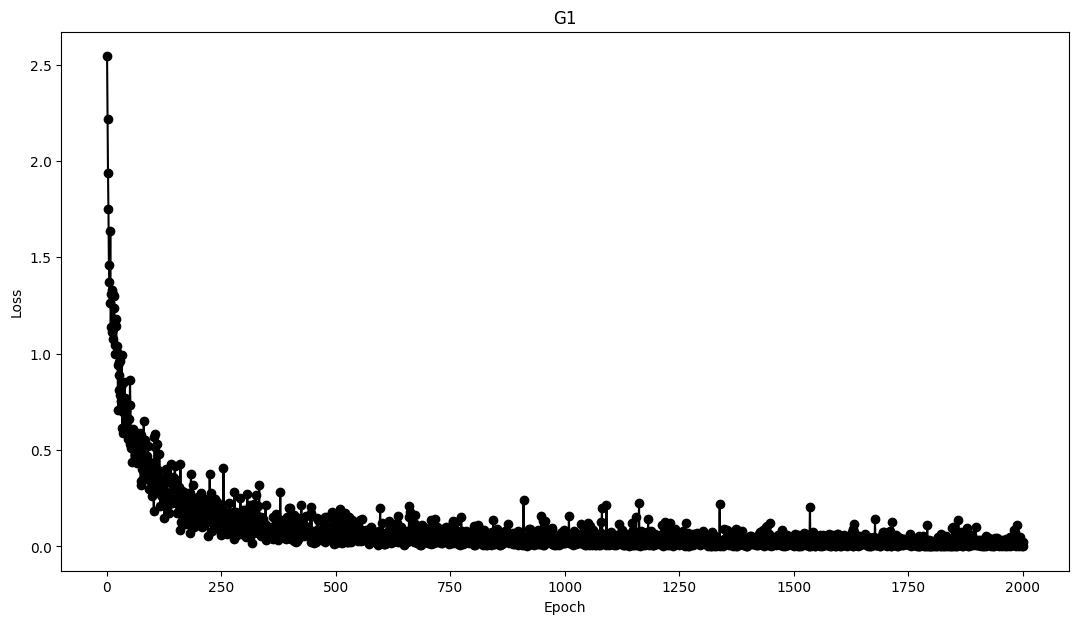

Epoch 0: loss 3.2692529261112213%, 3->3.
Epoch 100: loss 5.694501847028732%, 3->3.
Epoch 200: loss 0.36594364792108536%, 1->1.
Epoch 300: loss 1.5096110291779041%, 3->3.
Epoch 400: loss 6.852943450212479%, 4->4.
Epoch 500: loss 0.2664655679836869%, 7->7.
Epoch 600: loss 2.7161316946148872%, 1->1.
Epoch 700: loss 0.18236085306853056%, 1->1.
Epoch 800: loss 0.19285453017801046%, 3->3.
Epoch 900: loss 2.564450353384018%, 3->3.
Epoch 1000: loss 3.3827751874923706%, 1->6.
Epoch 1100: loss 0.5657215137034655%, 8->8.
Epoch 1200: loss 3.028515540063381%, 3->3.
Epoch 1300: loss 0.29338235035538673%, 7->7.
Epoch 1400: loss 1.630798913538456%, 8->8.
Epoch 1500: loss 0.2603165106847882%, 5->5.
Epoch 1600: loss 0.5031339824199677%, 8->8.
Epoch 1700: loss 0.8564827032387257%, 8->8.
Epoch 1800: loss 0.05698913591913879%, 8->8.
Epoch 1900: loss 0.268879602663219%, 3->3.
Loss: 0.0~0.38(0.02 on average)
Vibration: False
{'min_loss': 0.0004528167482931167, 'max_loss': 0.38455861806869507, 'average_loss':

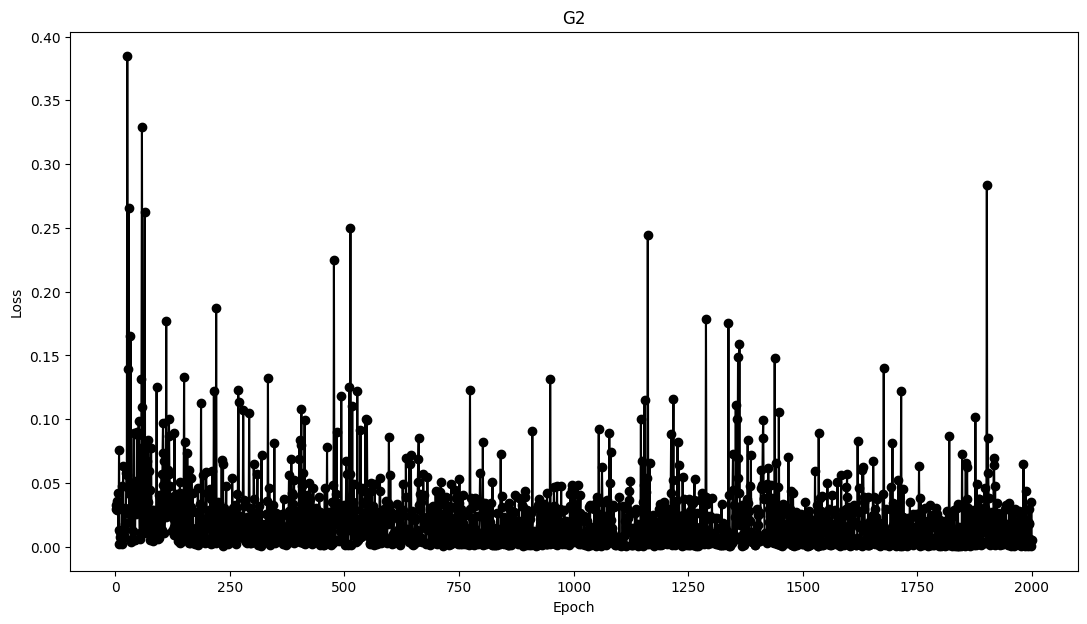

Epoch 0: loss 2.0392678678035736%, 3->3.
Epoch 100: loss 1.906476728618145%, 3->3.
Epoch 200: loss 0.08405335247516632%, 1->1.
Epoch 300: loss 0.6621033418923616%, 3->3.
Epoch 400: loss 2.8761887922883034%, 4->4.
Epoch 500: loss 0.17837992636486888%, 7->7.
Epoch 600: loss 1.5157157555222511%, 1->1.
Epoch 700: loss 0.07215793011710048%, 1->1.
Epoch 800: loss 0.07314418908208609%, 3->3.
Epoch 900: loss 2.0370185375213623%, 3->3.
Epoch 1000: loss 2.5837531313300133%, 1->1.
Epoch 1100: loss 0.7368831895291805%, 8->8.
Epoch 1200: loss 0.2653640229254961%, 3->3.
Epoch 1300: loss 0.135503348428756%, 7->7.
Epoch 1400: loss 0.9575644508004189%, 8->8.
Epoch 1500: loss 0.17310159746557474%, 5->5.
Epoch 1600: loss 0.7464992348104715%, 8->8.
Epoch 1700: loss 0.78935781493783%, 8->8.
Epoch 1800: loss 0.03261303354520351%, 8->8.
Epoch 1900: loss 0.060290645342320204%, 3->3.
Loss: 0.0~0.23(0.01 on average)
Vibration: False
{'min_loss': 0.00017124907753895968, 'max_loss': 0.23352409899234772, 'average_

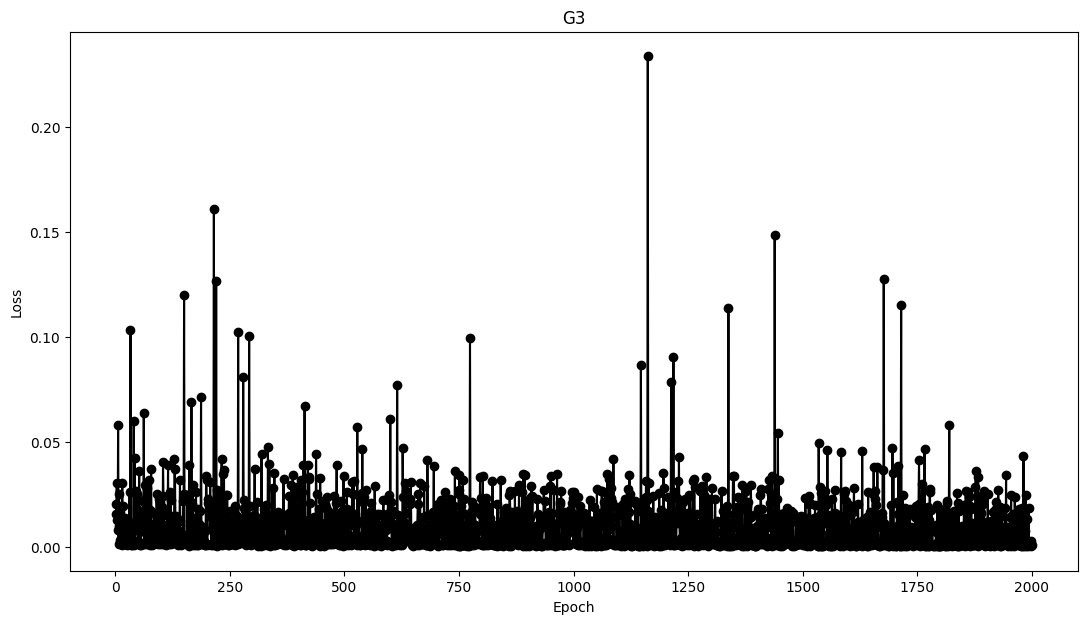

Epoch 0: loss 2.050945907831192%, 3->3.
Epoch 100: loss 20.33373713493347%, 3->3.
Epoch 200: loss 0.8297367952764034%, 1->1.
Epoch 300: loss 2.277698554098606%, 3->3.
Epoch 400: loss 13.676230609416962%, 4->4.
Epoch 500: loss 0.2972187241539359%, 7->7.
Epoch 600: loss 2.774179168045521%, 1->1.
Epoch 700: loss 5.226902291178703%, 1->1.
Epoch 800: loss 0.13461074559018016%, 3->3.
Epoch 900: loss 3.2599542289972305%, 3->3.
Epoch 1000: loss 3.055526688694954%, 1->6.
Epoch 1100: loss 0.6713906303048134%, 8->8.
Epoch 1200: loss 5.421178787946701%, 3->3.
Epoch 1300: loss 0.577396946027875%, 7->7.
Epoch 1400: loss 2.4185145273804665%, 8->8.
Epoch 1500: loss 0.5789187736809254%, 5->5.
Epoch 1600: loss 0.3938776906579733%, 8->8.
Epoch 1700: loss 0.655845133587718%, 8->8.
Epoch 1800: loss 0.03483216860331595%, 8->8.
Epoch 1900: loss 0.2592251868918538%, 3->3.
Loss: 0.0~6.28(0.05 on average)
Vibration: False
{'min_loss': 0.00024520469014532864, 'max_loss': 6.28290319442749, 'average_loss': 0.04613

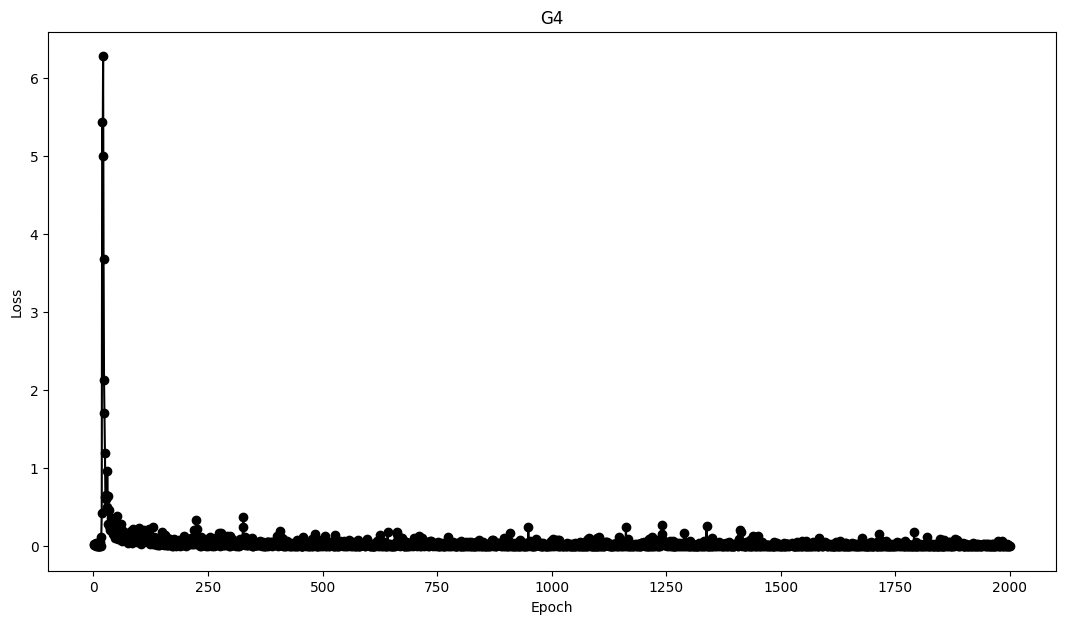

Epoch 0: loss 1.2869594618678093%, 3->3.
Epoch 100: loss 1.3314707204699516%, 3->3.
Epoch 200: loss 0.07424518698826432%, 1->1.
Epoch 300: loss 0.1293098204769194%, 3->3.
Epoch 400: loss 3.5393599420785904%, 4->4.
Epoch 500: loss 0.20116751547902822%, 7->7.
Epoch 600: loss 0.9568515233695507%, 1->1.
Epoch 700: loss 0.14684038469567895%, 1->1.
Epoch 800: loss 0.03595573361963034%, 3->3.
Epoch 900: loss 1.8681183457374573%, 3->3.
Epoch 1000: loss 2.568094991147518%, 1->1.
Epoch 1100: loss 0.8445938117802143%, 8->8.
Epoch 1200: loss 0.3373415442183614%, 3->3.
Epoch 1300: loss 0.09107571677304804%, 7->7.
Epoch 1400: loss 1.503892708569765%, 8->8.
Epoch 1500: loss 0.19528500270098448%, 5->5.
Epoch 1600: loss 1.3326596468687057%, 8->8.
Epoch 1700: loss 1.0561979375779629%, 8->8.
Epoch 1800: loss 0.02583393652457744%, 8->8.
Epoch 1900: loss 0.06688085268251598%, 3->3.
Loss: 0.0~0.2(0.01 on average)
Vibration: False
{'min_loss': 0.00015117759176064283, 'max_loss': 0.19774948060512543, 'average

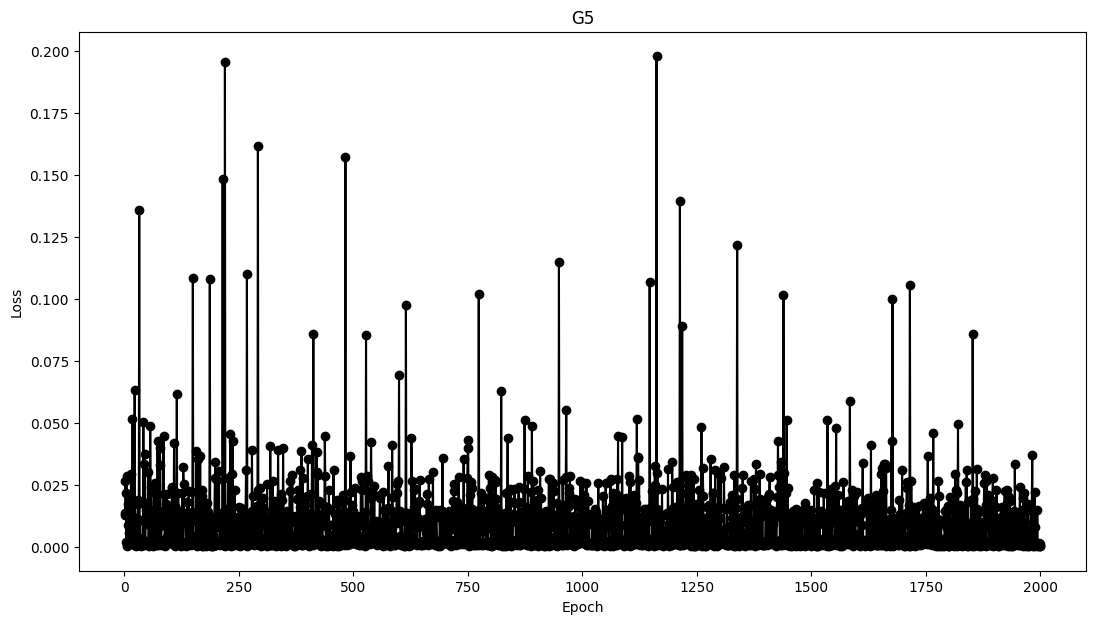

Epoch 0: loss 1.3345226645469666%, 3->3.
Epoch 100: loss 1.0819880291819572%, 1->1.
Epoch 200: loss 1.9912725314497948%, 4->4.
Epoch 300: loss 1.1908870190382004%, 1->1.
Epoch 400: loss 1.6866141930222511%, 3->3.
Epoch 500: loss 2.2561926394701004%, 1->1.
Epoch 600: loss 0.5555075127631426%, 3->3.
Epoch 700: loss 1.561861764639616%, 8->8.
Epoch 800: loss 1.2423048727214336%, 8->8.
Epoch 900: loss 0.8080434054136276%, 8->8.
Epoch 1000: loss 1.534935925155878%, 3->3.
Epoch 1100: loss 1.4828474260866642%, 1->1.
Epoch 1200: loss 1.426217146217823%, 4->4.
Epoch 1300: loss 0.44240024872124195%, 7->7.
Epoch 1400: loss 0.768684409558773%, 1->1.
Epoch 1500: loss 3.8847412914037704%, 1->1.
Epoch 1600: loss 0.1771755749359727%, 8->8.
Epoch 1700: loss 1.1400891467928886%, 5->5.
Epoch 1800: loss 0.09810535702854395%, 3->3.
Epoch 1900: loss 0.5799902137368917%, 8->8.
Loss: 0.0~0.13(0.01 on average)
Vibration: False
{'min_loss': 0.00016623719420749694, 'max_loss': 0.1315223127603531, 'average_loss': 

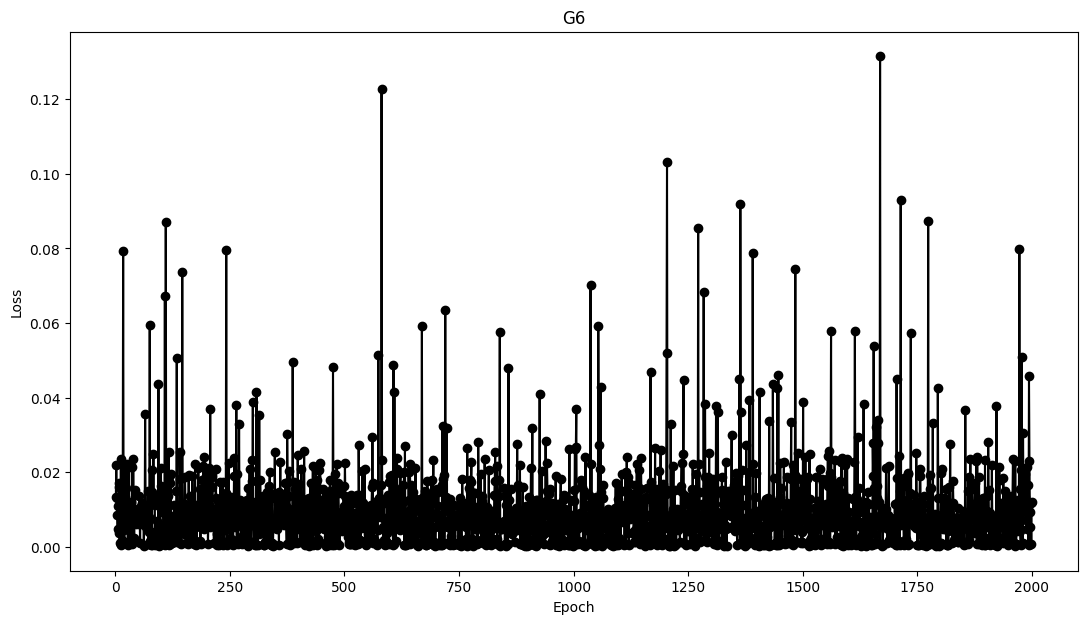

Epoch 0: loss 1.3939520344138145%, 3->3.
Epoch 100: loss 0.9036636911332607%, 1->1.
Epoch 200: loss 1.7432086169719696%, 4->4.
Epoch 300: loss 1.1563184671103954%, 1->1.
Epoch 400: loss 0.9246653877198696%, 3->3.
Epoch 500: loss 2.1772153675556183%, 1->1.
Epoch 600: loss 0.5249658599495888%, 3->3.
Epoch 700: loss 1.5046445652842522%, 8->8.
Epoch 800: loss 1.2814175337553024%, 8->8.
Epoch 900: loss 0.7608106359839439%, 8->8.
Epoch 1000: loss 1.306202169507742%, 3->3.
Epoch 1100: loss 1.4873641543090343%, 1->1.
Epoch 1200: loss 1.2044946663081646%, 4->4.
Epoch 1300: loss 0.4714835900813341%, 7->7.
Epoch 1400: loss 0.636452017351985%, 1->1.
Epoch 1500: loss 3.5810593515634537%, 1->1.
Epoch 1600: loss 0.15463557792827487%, 8->8.
Epoch 1700: loss 1.1648868210613728%, 5->5.
Epoch 1800: loss 0.06252718740142882%, 3->3.
Epoch 1900: loss 0.5780603270977736%, 8->8.
Loss: 0.0~0.11(0.01 on average)
Vibration: False
{'min_loss': 0.00010065225069411099, 'max_loss': 0.11360540986061096, 'average_loss

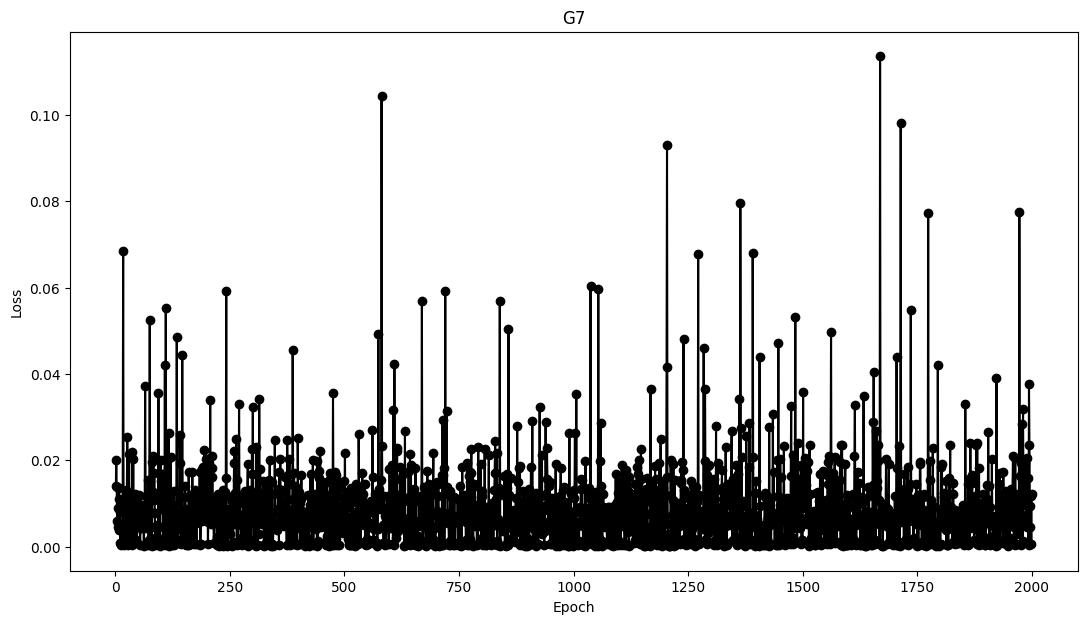

Epoch 0: loss 1.3927402906119823%, 3->3.
Epoch 100: loss 0.934973731637001%, 1->1.
Epoch 200: loss 1.624596118927002%, 4->4.
Epoch 300: loss 1.131470873951912%, 1->1.
Epoch 400: loss 0.7836226373910904%, 3->3.
Epoch 500: loss 2.131357230246067%, 1->1.
Epoch 600: loss 0.5159868393093348%, 3->3.
Epoch 700: loss 1.5417464077472687%, 8->8.
Epoch 800: loss 1.306579727679491%, 8->8.
Epoch 900: loss 0.7464480120688677%, 8->8.
Epoch 1000: loss 1.3732529245316982%, 3->3.
Epoch 1100: loss 1.516768243163824%, 1->1.
Epoch 1200: loss 1.3789914548397064%, 4->4.
Epoch 1300: loss 0.44350726529955864%, 7->7.
Epoch 1400: loss 0.6454866845160723%, 1->1.
Epoch 1500: loss 2.886086329817772%, 1->1.
Epoch 1600: loss 0.12795532820746303%, 8->8.
Epoch 1700: loss 1.1312604881823063%, 5->5.
Epoch 1800: loss 0.062320748111233115%, 3->3.
Epoch 1900: loss 0.5143301095813513%, 8->8.
Loss: 0.0~0.09(0.01 on average)
Vibration: False
{'min_loss': 8.063418499659747e-05, 'max_loss': 0.08741772174835205, 'average_loss': 0

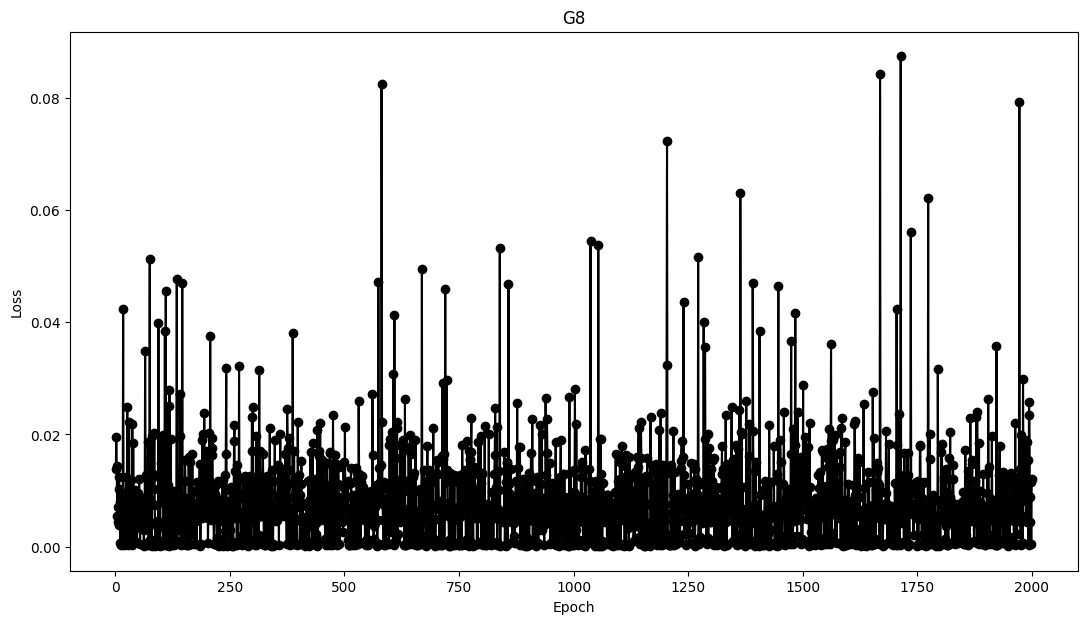

Epoch 0: loss 1.305747777223587%, 3->3.
Epoch 100: loss 0.9419241920113564%, 1->1.
Epoch 200: loss 1.6574643552303314%, 4->4.
Epoch 300: loss 1.1882541701197624%, 1->1.
Epoch 400: loss 0.6855621002614498%, 3->3.
Epoch 500: loss 2.1460380405187607%, 1->1.
Epoch 600: loss 0.6053901743143797%, 3->3.
Epoch 700: loss 1.4859559014439583%, 8->8.
Epoch 800: loss 1.2994316406548023%, 8->8.
Epoch 900: loss 0.716087082400918%, 8->8.
Epoch 1000: loss 1.1449317447841167%, 3->3.
Epoch 1100: loss 1.4703276567161083%, 1->1.
Epoch 1200: loss 0.9347575716674328%, 4->4.
Epoch 1300: loss 0.5198390688747168%, 7->7.
Epoch 1400: loss 0.701092230156064%, 1->1.
Epoch 1500: loss 4.608223587274551%, 1->1.
Epoch 1600: loss 0.13452157145366073%, 8->8.
Epoch 1700: loss 1.1586020700633526%, 5->5.
Epoch 1800: loss 0.05411166348494589%, 3->3.
Epoch 1900: loss 0.7121548522263765%, 8->8.
Loss: 0.0~0.11(0.01 on average)
Vibration: False
{'min_loss': 6.113759445725009e-05, 'max_loss': 0.10832032561302185, 'average_loss': 

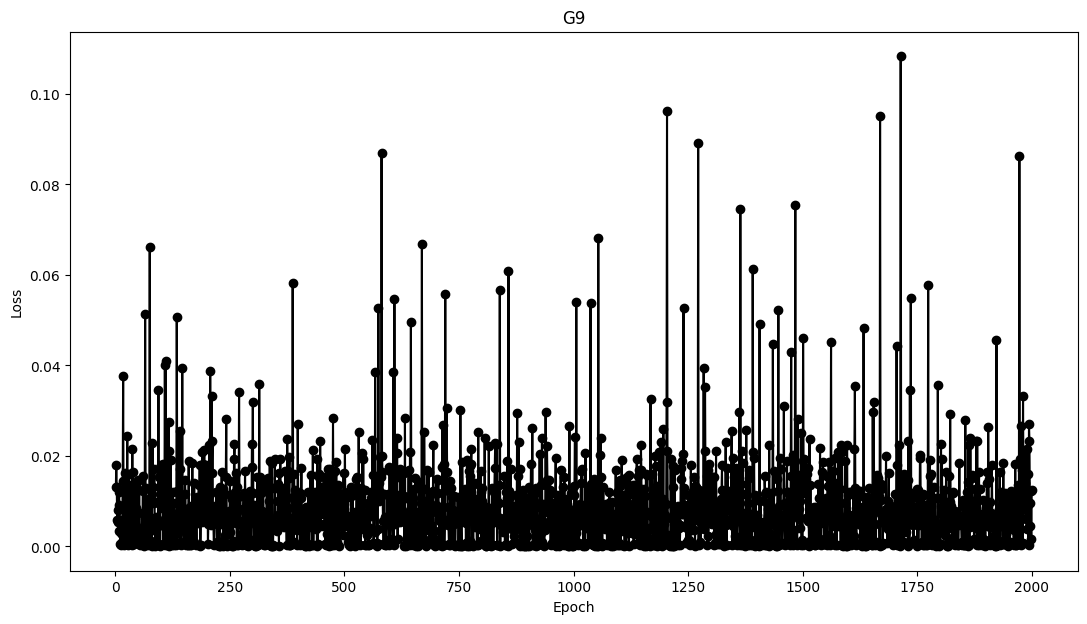

Epoch 0: loss 1.2771664187312126%, 3->3.
Epoch 100: loss 0.7602841593325138%, 1->1.
Epoch 200: loss 1.5517682768404484%, 4->4.
Epoch 300: loss 1.1470415629446507%, 1->1.
Epoch 400: loss 0.7777663413435221%, 3->3.
Epoch 500: loss 2.4410387501120567%, 1->1.
Epoch 600: loss 0.4083310719579458%, 3->3.
Epoch 700: loss 1.545367855578661%, 8->8.
Epoch 800: loss 1.198733877390623%, 8->8.
Epoch 900: loss 0.7856536656618118%, 8->8.
Epoch 1000: loss 1.4019832015037537%, 3->3.
Epoch 1100: loss 1.5089860185980797%, 1->1.
Epoch 1200: loss 1.5185804106295109%, 4->4.
Epoch 1300: loss 0.4409522283822298%, 7->7.
Epoch 1400: loss 0.7020711433142424%, 1->1.
Epoch 1500: loss 2.579445205628872%, 1->1.
Epoch 1600: loss 0.034024904016405344%, 8->8.
Epoch 1700: loss 1.1485999450087547%, 5->5.
Epoch 1800: loss 0.04586318100336939%, 3->3.
Epoch 1900: loss 0.4857032559812069%, 8->8.
Loss: 0.0~0.09(0.01 on average)
Vibration: False
{'min_loss': 5.852599497302435e-05, 'max_loss': 0.08569328486919403, 'average_loss'

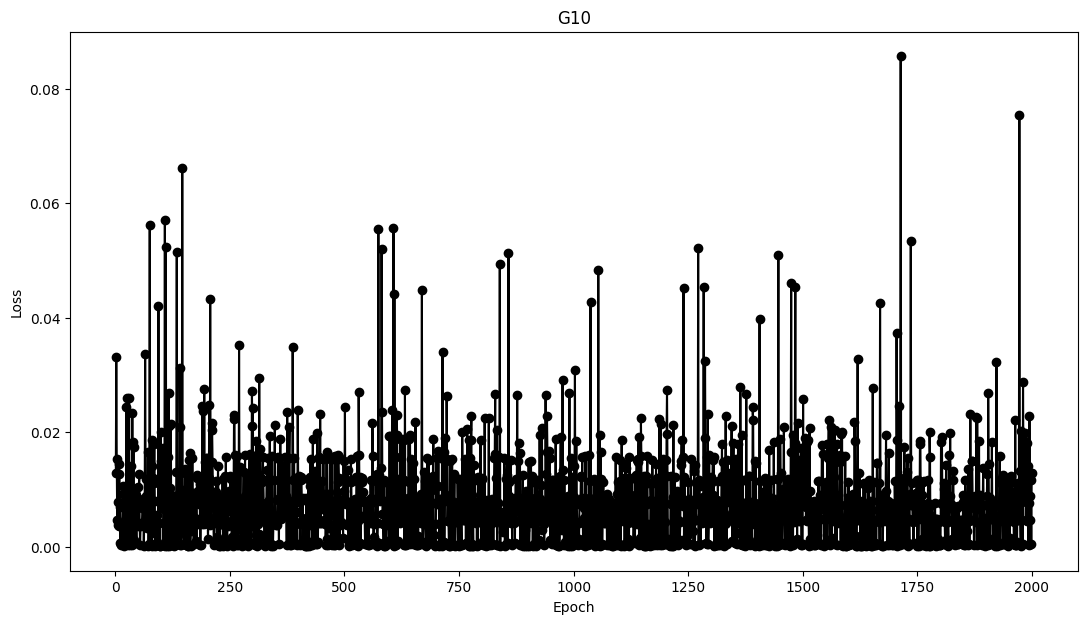

Epoch 0: loss 0.23040713276714087%, 3->3.
Epoch 100: loss 0.0691375695168972%, 3->3.
Epoch 200: loss 0.051126640755683184%, 3->3.
Epoch 300: loss 0.13055307790637016%, 1->1.
Epoch 400: loss 0.021643834770657122%, 1->1.
Epoch 500: loss 0.09839392732828856%, 1->1.
Epoch 600: loss 0.02265156217617914%, 3->3.
Epoch 700: loss 0.020432763267308474%, 7->7.
Epoch 800: loss 2.0270414650440216%, 4->4.
Epoch 900: loss 0.01690934441285208%, 4->4.
Epoch 1000: loss 0.007712448132224381%, 7->7.
Epoch 1100: loss 0.022926759265828878%, 1->1.
Epoch 1200: loss 0.03196893958374858%, 1->1.
Epoch 1300: loss 0.08978474652394652%, 1->1.
Epoch 1400: loss 0.0175482637132518%, 1->1.
Epoch 1500: loss 3.8586679846048355%, 3->3.
Epoch 1600: loss 0.01095306797651574%, 3->3.
Epoch 1700: loss 0.04113511822652072%, 7->7.
Epoch 1800: loss 4.506675899028778%, 3->3.
Epoch 1900: loss 1.4052762649953365%, 4->4.
Loss: 0.0~0.22(0.01 on average)
Vibration: False
{'min_loss': 1.1775333405239508e-05, 'max_loss': 0.22075673937797

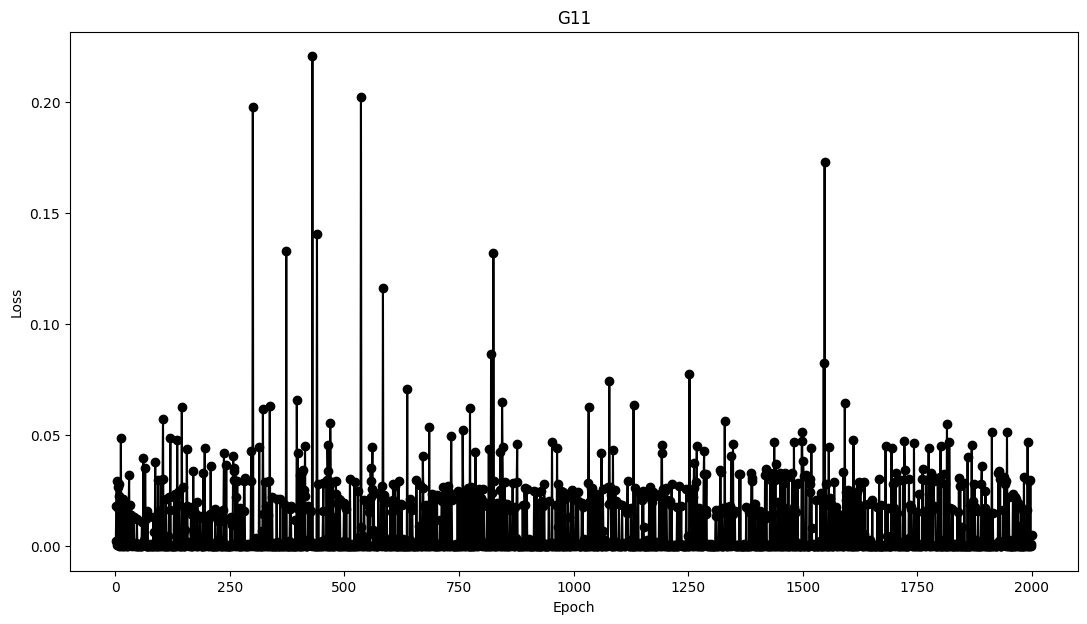

Epoch 0: loss 0.1496488112024963%, 3->3.
Epoch 100: loss 0.09155313018709421%, 3->3.
Epoch 200: loss 0.029327505035325885%, 3->3.
Epoch 300: loss 0.10630059987306595%, 1->1.
Epoch 400: loss 0.015089938824530691%, 1->1.
Epoch 500: loss 0.07460296619683504%, 1->1.
Epoch 600: loss 0.013914461305830628%, 3->3.
Epoch 700: loss 0.011508219176903367%, 7->7.
Epoch 800: loss 2.0601697266101837%, 4->4.
Epoch 900: loss 0.013234368816483766%, 4->4.
Epoch 1000: loss 0.0080669138696976%, 7->7.
Epoch 1100: loss 0.015083554899320006%, 1->1.
Epoch 1200: loss 0.029613717924803495%, 1->1.
Epoch 1300: loss 0.08998607518151402%, 1->1.
Epoch 1400: loss 0.011270432150922716%, 1->1.
Epoch 1500: loss 3.758808970451355%, 3->3.
Epoch 1600: loss 0.008822764357319102%, 3->3.
Epoch 1700: loss 0.06102006300352514%, 7->7.
Epoch 1800: loss 4.606777802109718%, 3->3.
Epoch 1900: loss 1.4149843715131283%, 4->4.
Loss: 0.0~0.22(0.01 on average)
Vibration: False
{'min_loss': 8.32960540719796e-06, 'max_loss': 0.2245887815952

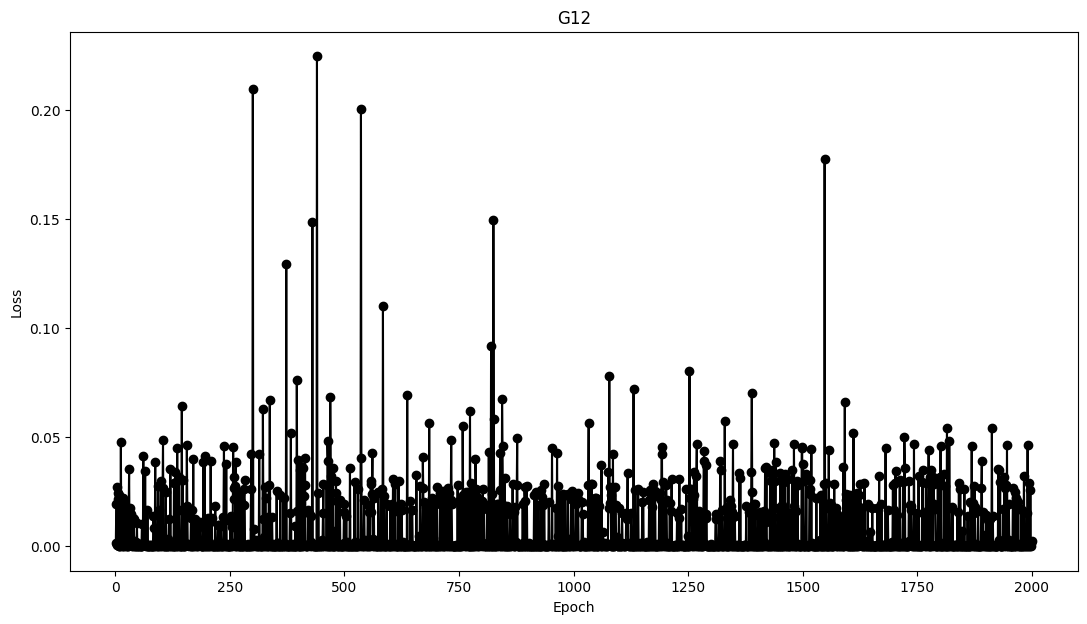

Epoch 0: loss 0.05265744403004646%, 3->3.
Epoch 100: loss 0.03570973640307784%, 3->3.
Epoch 200: loss 0.018092134268954396%, 3->3.
Epoch 300: loss 0.0741434923838824%, 1->1.
Epoch 400: loss 0.012152365525253117%, 1->1.
Epoch 500: loss 0.0652475340757519%, 1->1.
Epoch 600: loss 0.010249789920635521%, 3->3.
Epoch 700: loss 0.008583568705944344%, 7->7.
Epoch 800: loss 2.2151343524456024%, 4->4.
Epoch 900: loss 0.011357077164575458%, 4->4.
Epoch 1000: loss 0.0068213732447475195%, 7->7.
Epoch 1100: loss 0.01147863149526529%, 1->1.
Epoch 1200: loss 0.02902176638599485%, 1->1.
Epoch 1300: loss 0.07570077432319522%, 1->1.
Epoch 1400: loss 0.011716627341229469%, 1->1.
Epoch 1500: loss 3.2768383622169495%, 3->3.
Epoch 1600: loss 0.004929509668727405%, 3->3.
Epoch 1700: loss 0.034292531199753284%, 7->7.
Epoch 1800: loss 4.36880886554718%, 3->3.
Epoch 1900: loss 1.5427830629050732%, 4->4.
Loss: 0.0~0.2(0.01 on average)
Vibration: False
{'min_loss': 7.748489224468358e-06, 'max_loss': 0.199920043349

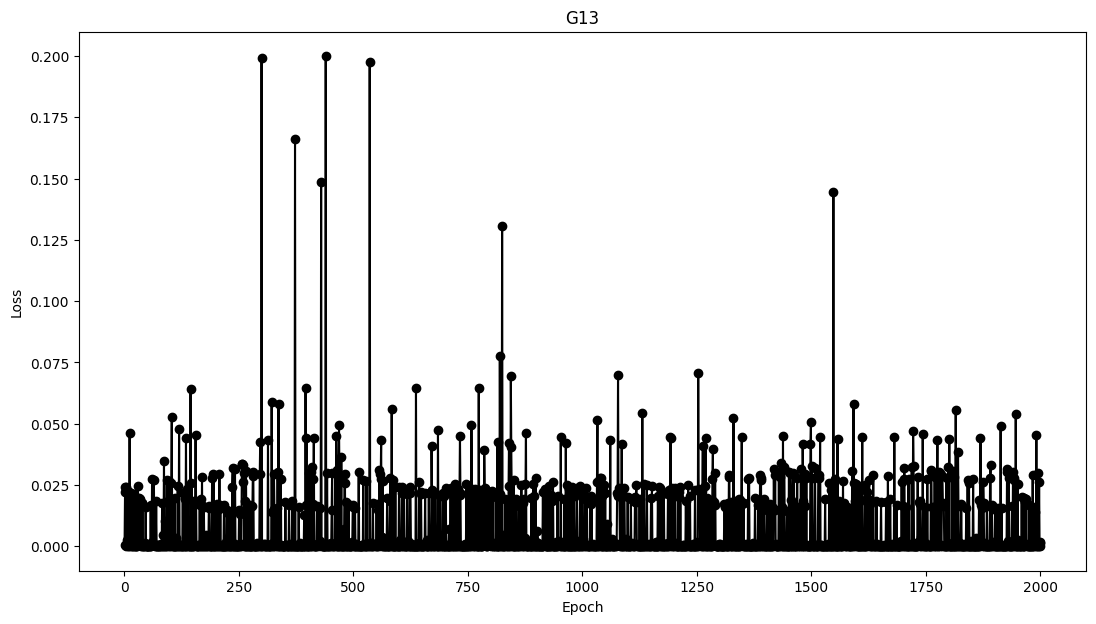

Epoch 0: loss 0.07890105480328202%, 3->3.
Epoch 100: loss 0.0748195277992636%, 3->3.
Epoch 200: loss 0.020204538304824382%, 3->3.
Epoch 300: loss 0.7425495889037848%, 1->1.
Epoch 400: loss 0.035186417517252266%, 1->1.
Epoch 500: loss 0.25146882981061935%, 1->1.
Epoch 600: loss 0.02801937807817012%, 3->3.
Epoch 700: loss 0.013126968406140804%, 7->7.
Epoch 800: loss 2.3924943059682846%, 4->4.
Epoch 900: loss 0.015561369946226478%, 4->4.
Epoch 1000: loss 0.0153740169480443%, 7->7.
Epoch 1100: loss 0.7445054594427347%, 1->1.
Epoch 1200: loss 3.7318963557481766%, 1->1.
Epoch 1300: loss 0.41792187839746475%, 1->1.
Epoch 1400: loss 0.05646905628964305%, 1->1.
Epoch 1500: loss 4.24557663500309%, 3->3.
Epoch 1600: loss 0.2696454292163253%, 3->3.
Epoch 1700: loss 0.03154344158247113%, 7->7.
Epoch 1800: loss 8.141107857227325%, 3->3.
Epoch 1900: loss 3.3934563398361206%, 4->4.
Loss: 0.0~1.17(0.02 on average)
Vibration: False
{'min_loss': 1.11864683276508e-05, 'max_loss': 1.1674420833587646, 'aver

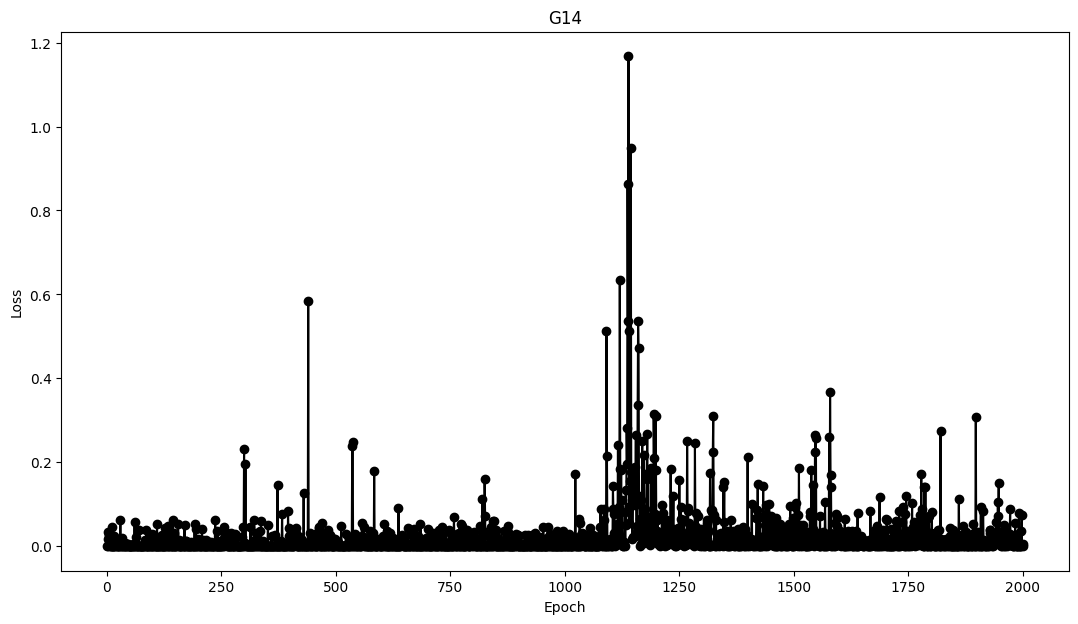

Epoch 0: loss 1.3446643017232418%, 3->3.
Epoch 100: loss 0.9837431833148003%, 3->3.
Epoch 200: loss 0.6559373810887337%, 3->3.
Epoch 300: loss 0.6080579478293657%, 1->1.
Epoch 400: loss 0.13447002274915576%, 1->1.
Epoch 500: loss 0.1583556761033833%, 1->1.
Epoch 600: loss 0.11714469874277711%, 3->3.
Epoch 700: loss 0.09562072227708995%, 7->7.
Epoch 800: loss 4.523144289851189%, 4->4.
Epoch 900: loss 0.07423291681334376%, 4->4.
Epoch 1000: loss 0.041434247395955026%, 7->7.
Epoch 1100: loss 0.12960152234882116%, 1->1.
Epoch 1200: loss 0.0234532926697284%, 1->1.
Epoch 1300: loss 0.12516829883679748%, 1->1.
Epoch 1400: loss 0.02795810578390956%, 1->1.
Epoch 1500: loss 3.970631957054138%, 3->3.
Epoch 1600: loss 0.02661188191268593%, 3->3.
Epoch 1700: loss 0.1455745310522616%, 7->7.
Epoch 1800: loss 4.437221586704254%, 3->3.
Epoch 1900: loss 2.7570294216275215%, 4->4.
Loss: 0.0~0.28(0.01 on average)
Vibration: False
{'min_loss': 3.1655443308409303e-05, 'max_loss': 0.2807801365852356, 'averag

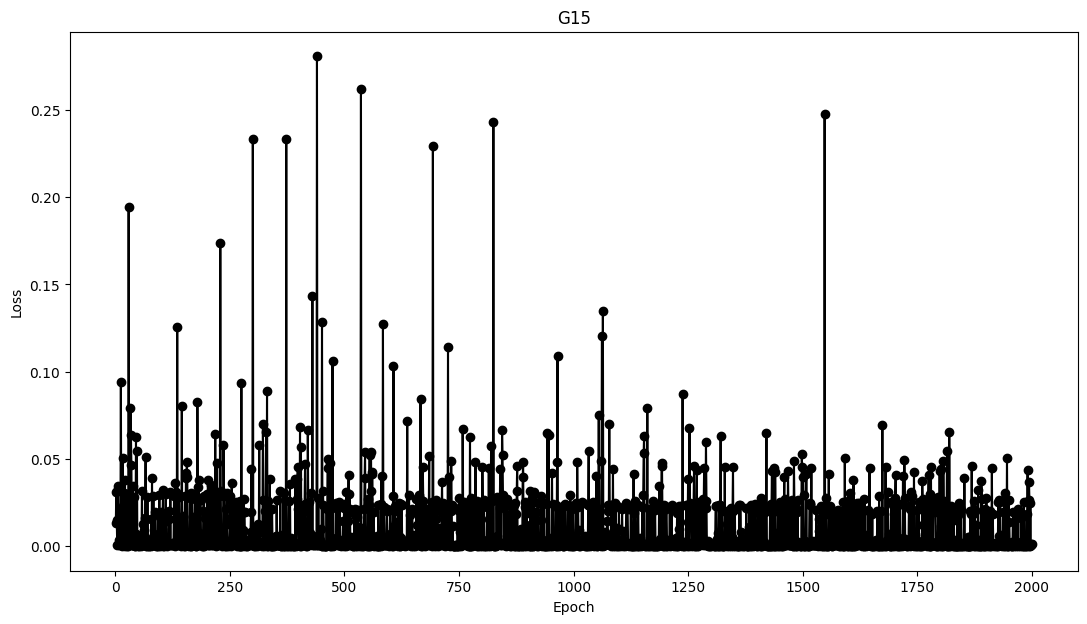

Epoch 0: loss 1.2523965910077095%, 3->3.
Epoch 100: loss 1.4538408257067204%, 3->3.
Epoch 200: loss 0.08070101612247527%, 1->1.
Epoch 300: loss 0.04438521864358336%, 3->3.
Epoch 400: loss 2.348482795059681%, 4->4.
Epoch 500: loss 0.0455324596259743%, 7->7.
Epoch 600: loss 1.12844817340374%, 1->1.
Epoch 700: loss 0.026109794271178544%, 1->1.
Epoch 800: loss 0.019983711536042392%, 3->3.
Epoch 900: loss 2.3425262421369553%, 3->3.
Epoch 1000: loss 1.8987007439136505%, 1->1.
Epoch 1100: loss 0.8153808303177357%, 8->8.
Epoch 1200: loss 0.028499041218310595%, 3->3.
Epoch 1300: loss 0.24327128194272518%, 7->7.
Epoch 1400: loss 1.6353962942957878%, 8->8.
Epoch 1500: loss 0.10087841656059027%, 5->5.
Epoch 1600: loss 0.7408129516988993%, 8->8.
Epoch 1700: loss 0.7616817019879818%, 8->8.
Epoch 1800: loss 0.005817878627567552%, 8->8.
Epoch 1900: loss 0.08671039249747992%, 3->3.
Epoch 2000: loss 1.4489944092929363%, 3->3.
Epoch 2100: loss 0.022705068113282323%, 8->8.
Epoch 2200: loss 0.0471500359708

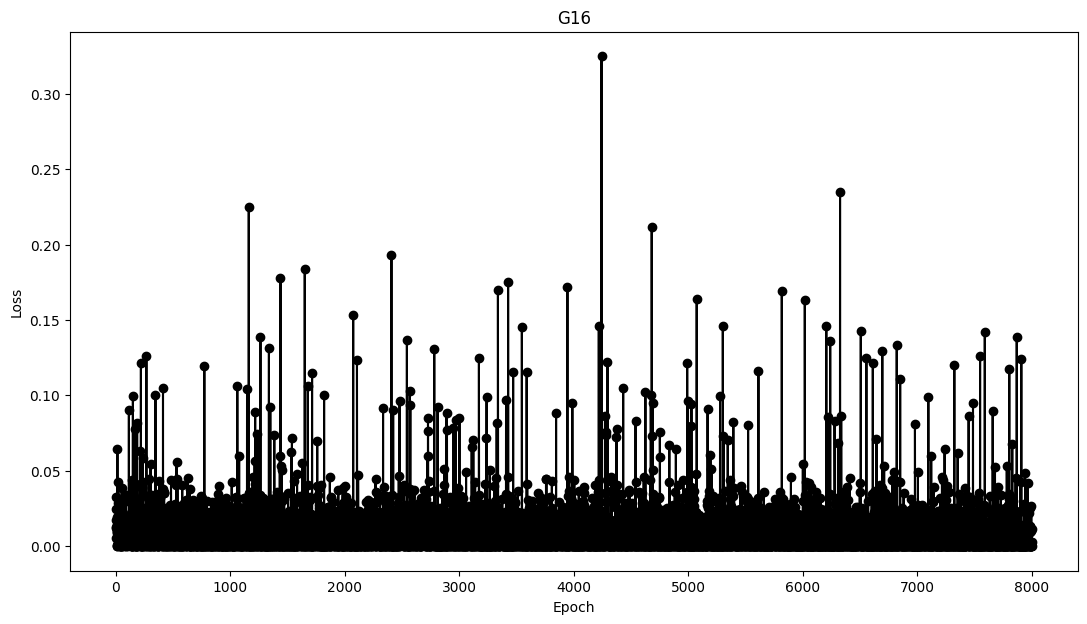

Epoch 0: loss 1.2051407247781754%, 3->3.
Epoch 100: loss 0.8234551176428795%, 3->3.
Epoch 200: loss 0.019837752915918827%, 1->1.
Epoch 300: loss 0.01012075153994374%, 3->3.
Epoch 400: loss 2.239076979458332%, 4->4.
Epoch 500: loss 0.07338814903050661%, 7->7.
Epoch 600: loss 1.2528257444500923%, 1->1.
Epoch 700: loss 0.009448875789530575%, 1->1.
Epoch 800: loss 0.010097280028276145%, 3->3.
Epoch 900: loss 2.3292137309908867%, 3->3.
Epoch 1000: loss 1.8145302310585976%, 1->1.
Epoch 1100: loss 0.7612688932567835%, 8->8.
Epoch 1200: loss 0.004477395850699395%, 3->3.
Epoch 1300: loss 0.0241371410083957%, 7->7.
Epoch 1400: loss 1.5171116217970848%, 8->8.
Epoch 1500: loss 0.019282869470771402%, 5->5.
Epoch 1600: loss 0.6169632077217102%, 8->8.
Epoch 1700: loss 0.7605508901178837%, 8->8.
Epoch 1800: loss 0.004591505057760514%, 8->8.
Epoch 1900: loss 0.019826230709441006%, 3->3.
Epoch 2000: loss 1.3572289608418941%, 3->3.
Epoch 2100: loss 0.019140909716952592%, 8->8.
Epoch 2200: loss 0.02949197

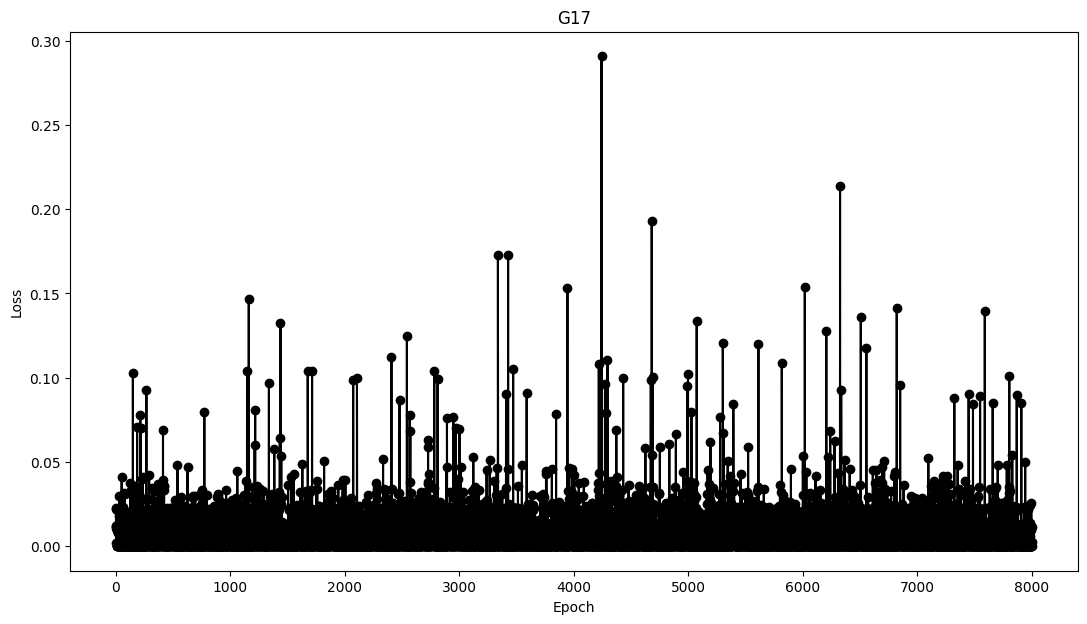

Epoch 0: loss 1.1530907824635506%, 3->3.
Epoch 100: loss 1.0331088677048683%, 3->3.
Epoch 200: loss 0.010871719132410362%, 1->1.
Epoch 300: loss 0.004219562106300145%, 3->3.
Epoch 400: loss 2.166629396378994%, 4->4.
Epoch 500: loss 0.041447169496677816%, 7->7.
Epoch 600: loss 1.0317252948880196%, 1->1.
Epoch 700: loss 0.009222204243997112%, 1->1.
Epoch 800: loss 0.007332217501243576%, 3->3.
Epoch 900: loss 2.271152101457119%, 3->3.
Epoch 1000: loss 1.710909977555275%, 1->1.
Epoch 1100: loss 0.8945927955210209%, 8->8.
Epoch 1200: loss 0.007614513742737472%, 3->3.
Epoch 1300: loss 0.011546943278517574%, 7->7.
Epoch 1400: loss 1.4192147180438042%, 8->8.
Epoch 1500: loss 0.01117028368753381%, 5->5.
Epoch 1600: loss 0.7815741002559662%, 8->8.
Epoch 1700: loss 0.8604911155998707%, 8->8.
Epoch 1800: loss 0.0029756189178442582%, 8->8.
Epoch 1900: loss 0.011405635450500995%, 3->3.
Epoch 2000: loss 1.4952657744288445%, 3->3.
Epoch 2100: loss 0.022215128410607576%, 8->8.
Epoch 2200: loss 0.030742

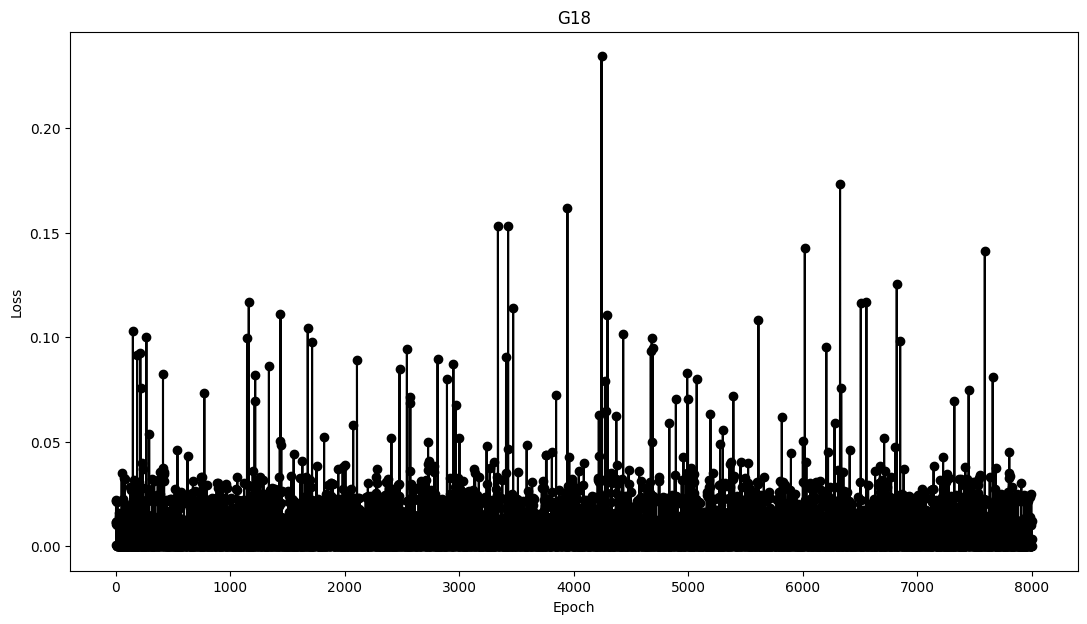

Epoch 0: loss 1.0766332037746906%, 3->3.
Epoch 100: loss 0.6801752373576164%, 3->3.
Epoch 200: loss 0.01107110147131607%, 1->1.
Epoch 300: loss 0.005985486495774239%, 3->3.
Epoch 400: loss 2.2777134552598%, 4->4.
Epoch 500: loss 0.03843120648525655%, 7->7.
Epoch 600: loss 1.4128945767879486%, 1->1.
Epoch 700: loss 0.007251178612932563%, 1->1.
Epoch 800: loss 0.006134366412879899%, 3->3.
Epoch 900: loss 2.3651141673326492%, 3->3.
Epoch 1000: loss 2.018793486058712%, 1->1.
Epoch 1100: loss 0.5927416030317545%, 8->8.
Epoch 1200: loss 0.009074877016246319%, 3->3.
Epoch 1300: loss 0.014402861415874213%, 7->7.
Epoch 1400: loss 1.8210962414741516%, 8->8.
Epoch 1500: loss 0.013319340359885246%, 5->5.
Epoch 1600: loss 0.461339857429266%, 8->8.
Epoch 1700: loss 0.6773835048079491%, 8->8.
Epoch 1800: loss 0.003327835656818934%, 8->8.
Epoch 1900: loss 0.008341626380570233%, 3->3.
Epoch 2000: loss 1.1847440153360367%, 3->3.
Epoch 2100: loss 0.011150668433401734%, 8->8.
Epoch 2200: loss 0.0110109118

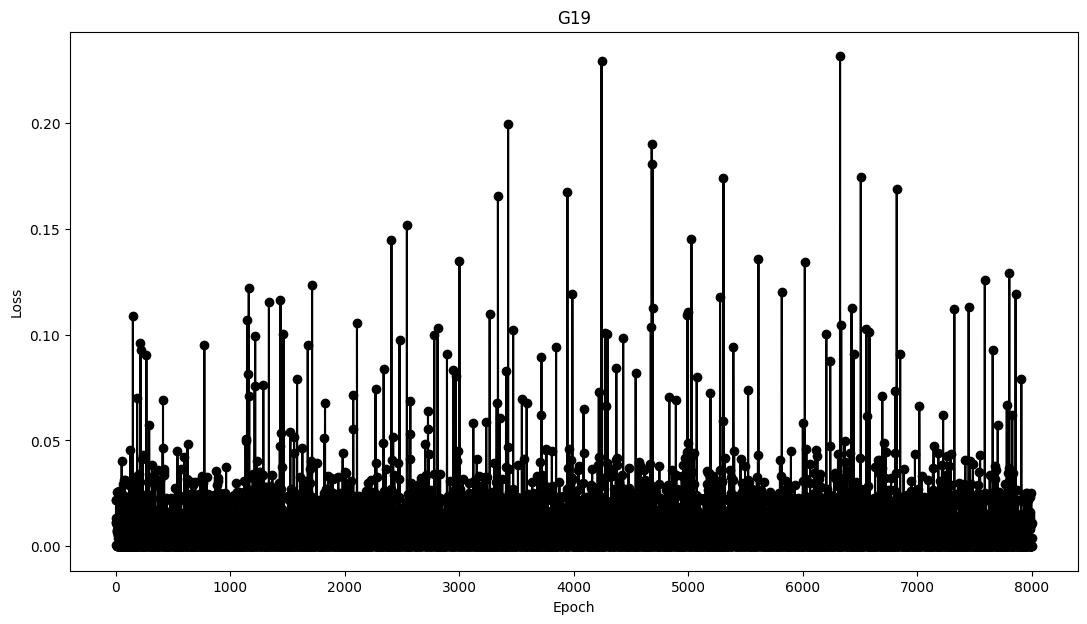

Epoch 0: loss 1.3352306559681892%, 3->3.
Epoch 100: loss 1.3137507252395153%, 3->3.
Epoch 200: loss 0.006016983388690278%, 1->1.
Epoch 300: loss 0.0054915755754336715%, 3->3.
Epoch 400: loss 2.147684618830681%, 4->4.
Epoch 500: loss 0.013393002154771239%, 7->7.
Epoch 600: loss 1.1543371714651585%, 1->1.
Epoch 700: loss 0.028717171517200768%, 1->1.
Epoch 800: loss 0.006350335024762899%, 3->3.
Epoch 900: loss 2.2642334923148155%, 3->3.
Epoch 1000: loss 2.029917761683464%, 1->1.
Epoch 1100: loss 1.070236787199974%, 8->8.
Epoch 1200: loss 0.008008456643437967%, 3->3.
Epoch 1300: loss 0.019658455858007073%, 7->7.
Epoch 1400: loss 1.2353469617664814%, 8->8.
Epoch 1500: loss 0.015314490883611143%, 5->5.
Epoch 1600: loss 0.9896743111312389%, 8->8.
Epoch 1700: loss 0.9716830216348171%, 8->8.
Epoch 1800: loss 0.0046842204028507695%, 8->8.
Epoch 1900: loss 0.013358770229388028%, 3->3.
Epoch 2000: loss 1.3146956451237202%, 3->3.
Epoch 2100: loss 0.01199885955429636%, 8->8.
Epoch 2200: loss 0.01284

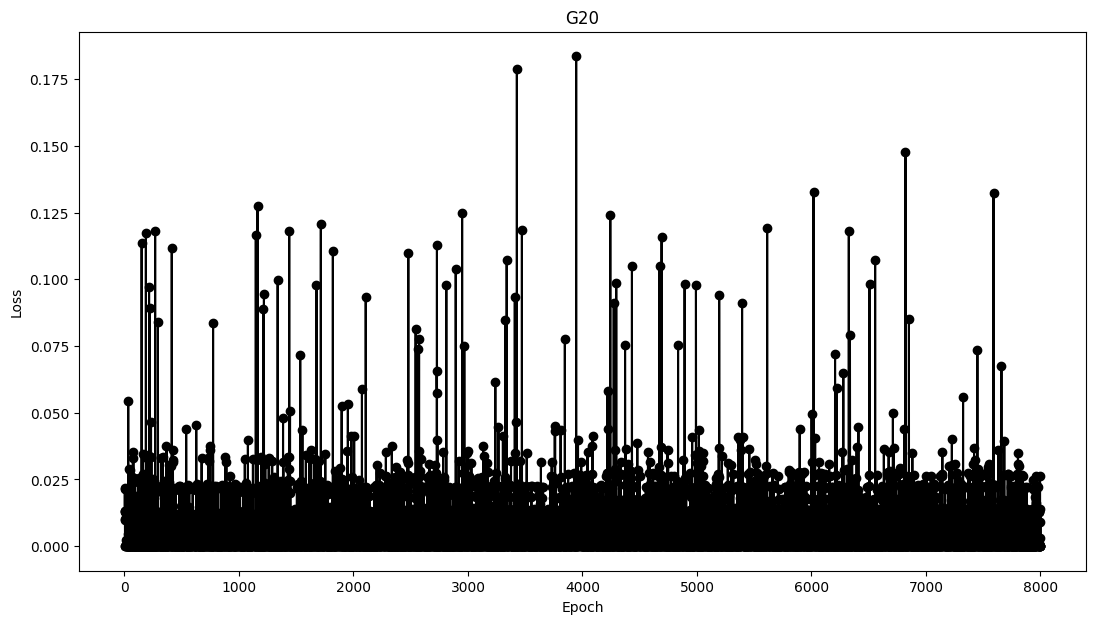

Epoch 0: loss 1.1436541564762592%, 3->3.
Epoch 100: loss 0.8508391678333282%, 1->1.
Epoch 200: loss 1.5687962993979454%, 4->4.
Epoch 300: loss 1.085607334971428%, 1->1.
Epoch 400: loss 0.673495139926672%, 3->3.
Epoch 500: loss 1.9565742462873459%, 1->1.
Epoch 600: loss 0.44128792360424995%, 3->3.
Epoch 700: loss 1.5611757524311543%, 8->8.
Epoch 800: loss 1.1389951221644878%, 8->8.
Epoch 900: loss 0.7110582664608955%, 8->8.
Epoch 1000: loss 1.426764577627182%, 3->3.
Epoch 1100: loss 1.5119372867047787%, 1->1.
Epoch 1200: loss 1.356447022408247%, 4->4.
Epoch 1300: loss 0.45065958984196186%, 7->7.
Epoch 1400: loss 0.6008645053952932%, 1->1.
Epoch 1500: loss 2.2830409929156303%, 1->1.
Epoch 1600: loss 0.013433887215796858%, 8->8.
Epoch 1700: loss 1.1529773473739624%, 5->5.
Epoch 1800: loss 0.032975326757878065%, 3->3.
Epoch 1900: loss 0.4910608287900686%, 8->8.
Epoch 2000: loss 0.006338114326354116%, 3->3.
Epoch 2100: loss 0.783785805106163%, 12->12.
Epoch 2200: loss 0.03880035947076976%, 

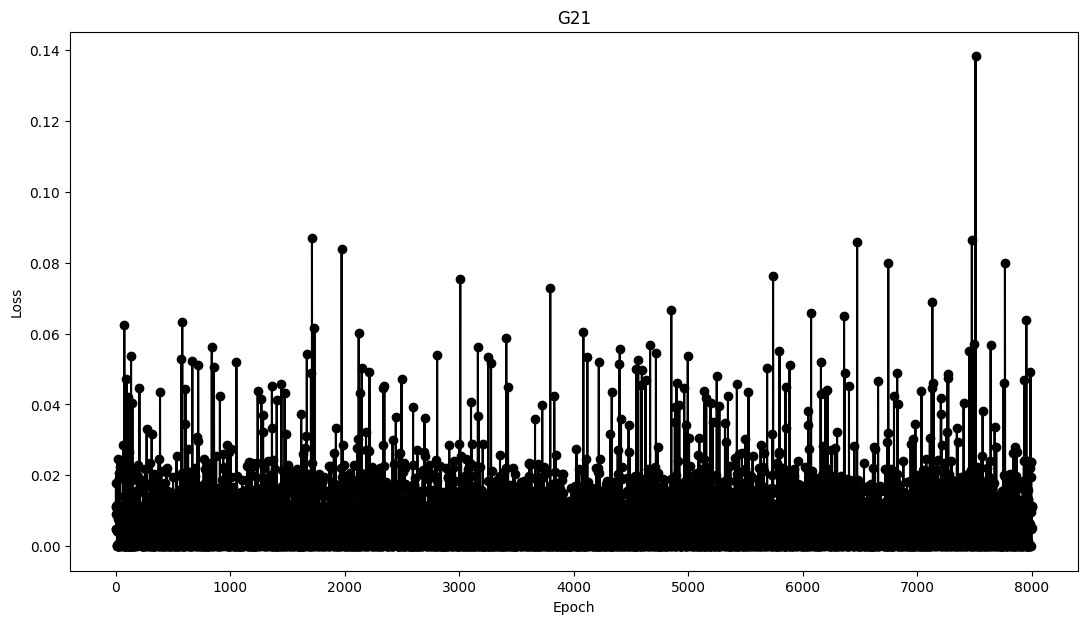

Epoch 0: loss 1.1337656527757645%, 3->3.
Epoch 100: loss 0.8450465276837349%, 1->1.
Epoch 200: loss 1.5797702595591545%, 4->4.
Epoch 300: loss 1.079181581735611%, 1->1.
Epoch 400: loss 0.6709014065563679%, 3->3.
Epoch 500: loss 1.9786201417446136%, 1->1.
Epoch 600: loss 0.4496344830840826%, 3->3.
Epoch 700: loss 1.542050950229168%, 8->8.
Epoch 800: loss 1.143624261021614%, 8->8.
Epoch 900: loss 0.7193018682301044%, 8->8.
Epoch 1000: loss 1.4195837080478668%, 3->3.
Epoch 1100: loss 1.511248666793108%, 1->1.
Epoch 1200: loss 1.3130974024534225%, 4->4.
Epoch 1300: loss 0.454509723931551%, 7->7.
Epoch 1400: loss 0.5690889433026314%, 1->1.
Epoch 1500: loss 2.4006301537156105%, 1->1.
Epoch 1600: loss 0.007188637391664088%, 8->8.
Epoch 1700: loss 1.1614540591835976%, 5->5.
Epoch 1800: loss 0.03455910773482174%, 3->3.
Epoch 1900: loss 0.4907875321805477%, 8->8.
Epoch 2000: loss 0.005404815237852745%, 3->3.
Epoch 2100: loss 0.7866970263421535%, 12->12.
Epoch 2200: loss 0.043806913890875876%, 3-

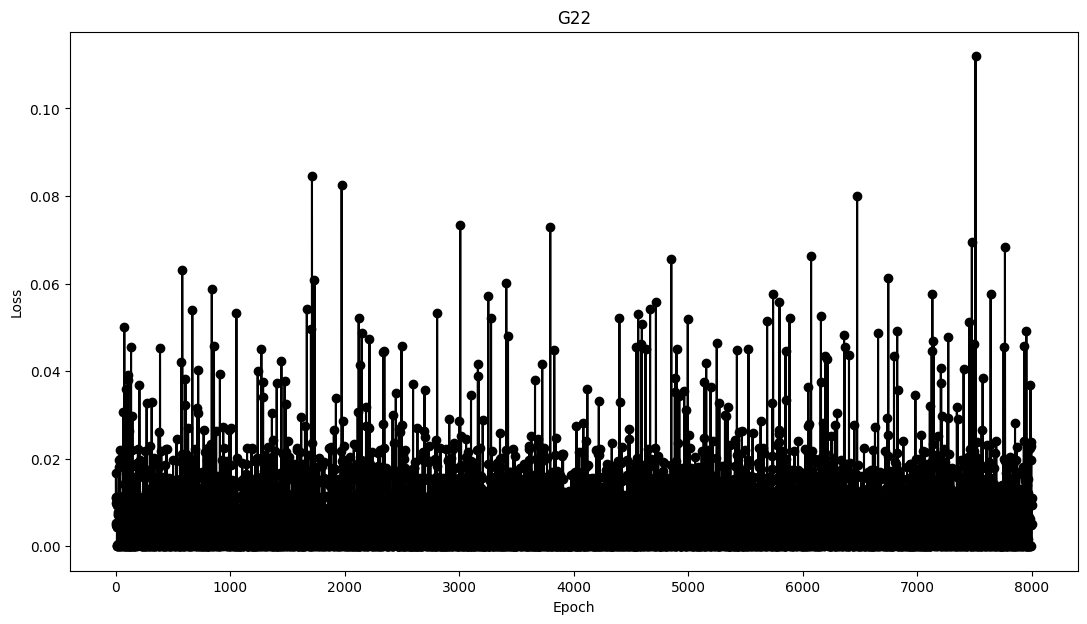

Epoch 0: loss 1.1163845658302307%, 3->3.
Epoch 100: loss 0.9270370006561279%, 1->1.
Epoch 200: loss 1.5583978965878487%, 4->4.
Epoch 300: loss 1.0740665718913078%, 1->1.
Epoch 400: loss 0.6750837434083223%, 3->3.
Epoch 500: loss 2.0296094939112663%, 1->1.
Epoch 600: loss 0.4355976823717356%, 3->3.
Epoch 700: loss 1.4526134356856346%, 8->8.
Epoch 800: loss 1.131004374474287%, 8->8.
Epoch 900: loss 0.6736255716532469%, 8->8.
Epoch 1000: loss 1.388239860534668%, 3->3.
Epoch 1100: loss 1.5063601545989513%, 1->1.
Epoch 1200: loss 1.4440849423408508%, 4->4.
Epoch 1300: loss 0.42582456953823566%, 7->7.
Epoch 1400: loss 0.6700641941279173%, 1->1.
Epoch 1500: loss 2.4135148152709007%, 1->1.
Epoch 1600: loss 0.0055712254834361374%, 8->8.
Epoch 1700: loss 1.125940028578043%, 5->5.
Epoch 1800: loss 0.021334068151190877%, 3->3.
Epoch 1900: loss 0.4586808383464813%, 8->8.
Epoch 2000: loss 0.005392537786974572%, 3->3.
Epoch 2100: loss 0.6935346405953169%, 12->12.
Epoch 2200: loss 0.030418604728765786

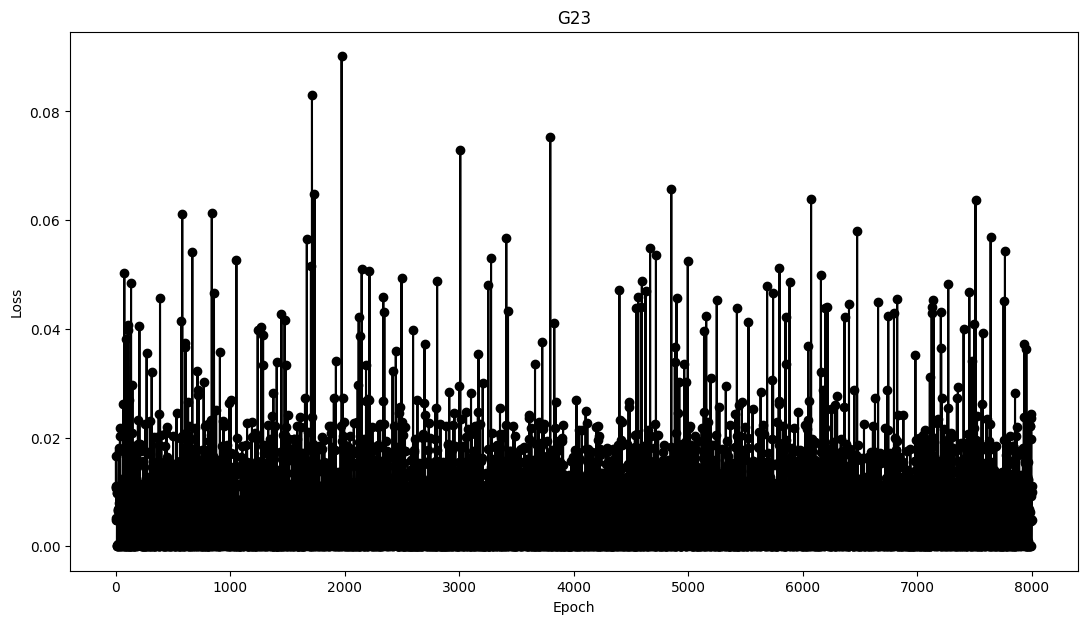

Epoch 0: loss 1.1253884993493557%, 3->3.
Epoch 100: loss 0.8521303534507751%, 1->1.
Epoch 200: loss 1.5640875324606895%, 4->4.
Epoch 300: loss 1.0929392650723457%, 1->1.
Epoch 400: loss 0.6474580150097609%, 3->3.
Epoch 500: loss 2.0551277324557304%, 1->1.
Epoch 600: loss 0.4847702104598284%, 3->3.
Epoch 700: loss 1.5072623267769814%, 8->8.
Epoch 800: loss 1.2134320102632046%, 8->8.
Epoch 900: loss 0.739887123927474%, 8->8.
Epoch 1000: loss 1.3069979846477509%, 3->3.
Epoch 1100: loss 1.511466596275568%, 1->1.
Epoch 1200: loss 1.0725406929850578%, 4->4.
Epoch 1300: loss 0.4870257806032896%, 7->7.
Epoch 1400: loss 0.46620978973805904%, 1->1.
Epoch 1500: loss 2.5236520916223526%, 1->1.
Epoch 1600: loss 0.0033682728826534003%, 8->8.
Epoch 1700: loss 1.1506871320307255%, 5->5.
Epoch 1800: loss 0.034329594927839935%, 3->3.
Epoch 1900: loss 0.5827101413160563%, 8->8.
Epoch 2000: loss 0.0035899196518585086%, 3->3.
Epoch 2100: loss 0.8433344773948193%, 12->12.
Epoch 2200: loss 0.0492677441798150

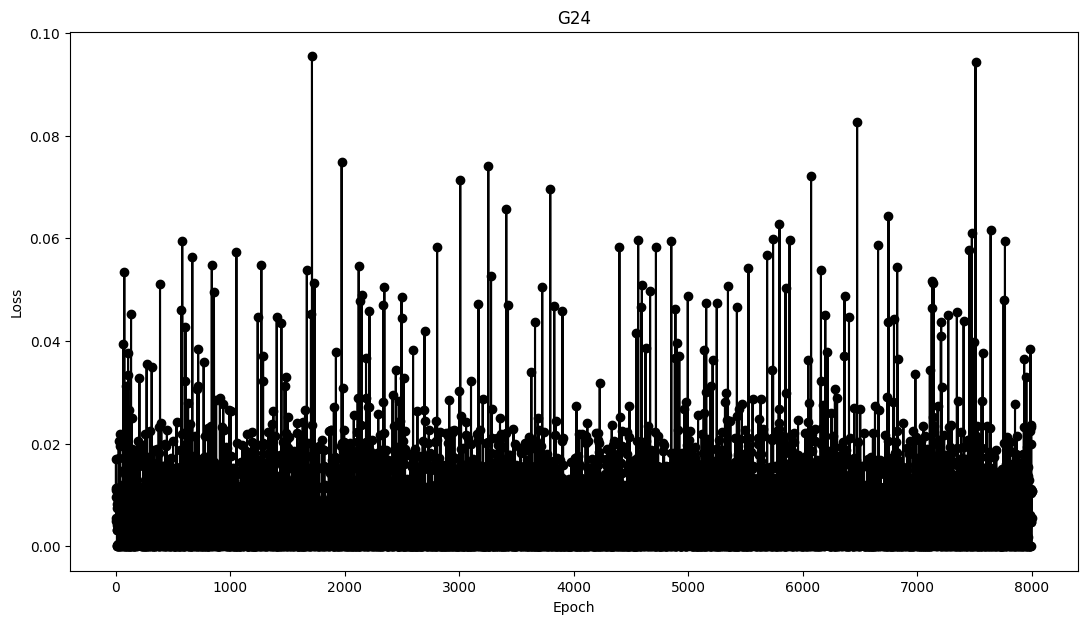

Epoch 0: loss 1.1121263727545738%, 3->3.
Epoch 100: loss 1.0764113627374172%, 1->1.
Epoch 200: loss 1.626771129667759%, 4->4.
Epoch 300: loss 1.1077112518250942%, 1->1.
Epoch 400: loss 0.5978204775601625%, 3->3.
Epoch 500: loss 2.1819116547703743%, 1->1.
Epoch 600: loss 0.49365274608135223%, 3->3.
Epoch 700: loss 1.539343036711216%, 8->8.
Epoch 800: loss 1.0908297263085842%, 8->8.
Epoch 900: loss 0.5902248434722424%, 8->8.
Epoch 1000: loss 1.222331915050745%, 3->3.
Epoch 1100: loss 1.5730714425444603%, 1->1.
Epoch 1200: loss 1.4610613696277142%, 4->4.
Epoch 1300: loss 0.46289199963212013%, 7->7.
Epoch 1400: loss 0.6604995578527451%, 1->1.
Epoch 1500: loss 2.4655943736433983%, 1->1.
Epoch 1600: loss 0.003910830128006637%, 8->8.
Epoch 1700: loss 1.0916580446064472%, 5->5.
Epoch 1800: loss 0.009010828216560185%, 3->3.
Epoch 1900: loss 0.47335103154182434%, 8->8.
Epoch 2000: loss 0.012373665231280029%, 3->3.
Epoch 2100: loss 0.5946253892034292%, 12->12.
Epoch 2200: loss 0.00843539819470606

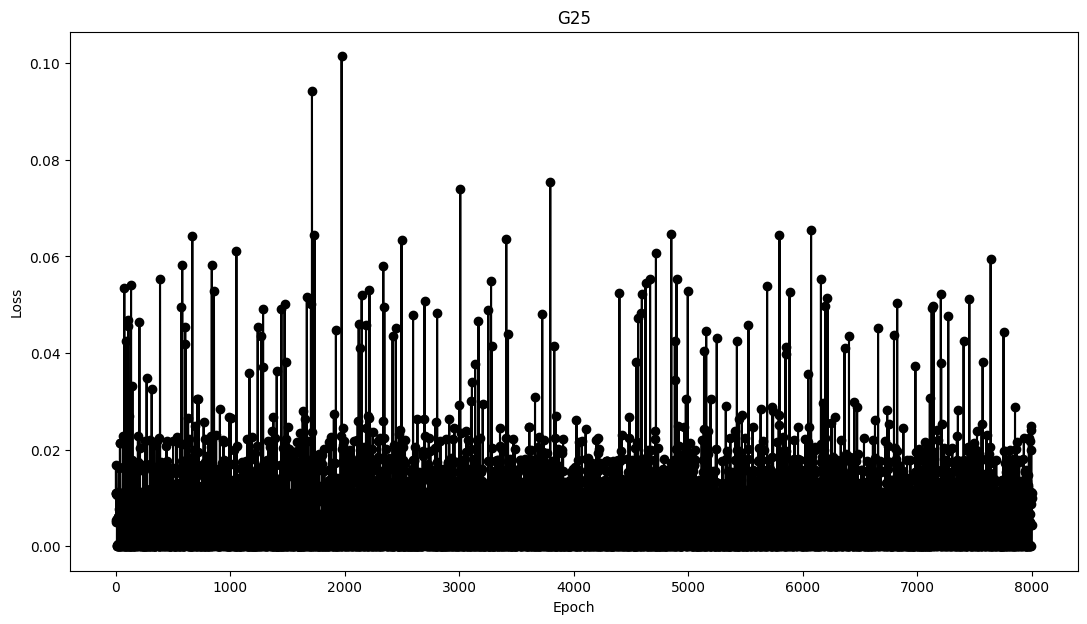

Epoch 0: loss 0.048913026694208384%, 3->3.
Epoch 100: loss 0.0036126482882536948%, 3->3.
Epoch 200: loss 0.004480343341128901%, 3->3.
Epoch 300: loss 0.46102595515549183%, 1->1.
Epoch 400: loss 0.006377016688929871%, 1->1.
Epoch 500: loss 0.04109376750420779%, 1->1.
Epoch 600: loss 0.003296057548141107%, 3->3.
Epoch 700: loss 0.0015510941011598334%, 7->7.
Epoch 800: loss 2.007508836686611%, 4->4.
Epoch 900: loss 0.008490293112117797%, 4->4.
Epoch 1000: loss 0.0026678084395825863%, 7->7.
Epoch 1100: loss 0.0015433413864229806%, 1->1.
Epoch 1200: loss 0.02201609022449702%, 1->1.
Epoch 1300: loss 0.0022072716092225164%, 1->1.
Epoch 1400: loss 0.0008556794455216732%, 1->1.
Epoch 1500: loss 3.540576249361038%, 3->3.
Epoch 1600: loss 0.006714272603858262%, 3->3.
Epoch 1700: loss 0.0012251590305822901%, 7->7.
Epoch 1800: loss 4.4780634343624115%, 3->3.
Epoch 1900: loss 1.6020884737372398%, 4->4.
Epoch 2000: loss 3.602442517876625%, 1->1.
Epoch 2100: loss 3.8139306008815765%, 12->12.
Epoch 220

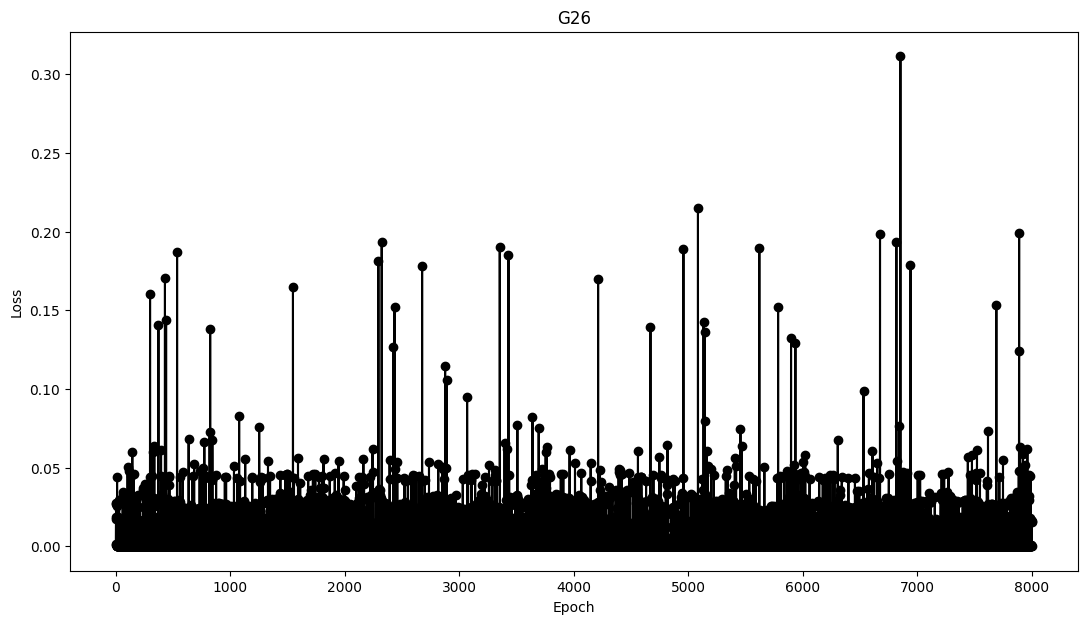

Epoch 0: loss 0.25056006852537394%, 3->3.
Epoch 100: loss 0.003839470082311891%, 3->3.
Epoch 200: loss 0.006045621557859704%, 3->3.
Epoch 300: loss 0.07375910063274205%, 1->1.
Epoch 400: loss 0.006778098759241402%, 1->1.
Epoch 500: loss 0.06871462101116776%, 1->1.
Epoch 600: loss 0.001812242771848105%, 3->3.
Epoch 700: loss 0.0009938648872775957%, 7->7.
Epoch 800: loss 1.9542578607797623%, 4->4.
Epoch 900: loss 0.00441986157966312%, 4->4.
Epoch 1000: loss 0.0012590959158842452%, 7->7.
Epoch 1100: loss 0.0011928134881600272%, 1->1.
Epoch 1200: loss 0.013276335084810853%, 1->1.
Epoch 1300: loss 0.0012649896234506741%, 1->1.
Epoch 1400: loss 0.0010828707672771998%, 1->1.
Epoch 1500: loss 3.3627893775701523%, 3->3.
Epoch 1600: loss 0.0040024406189331785%, 3->3.
Epoch 1700: loss 0.0004850235200137831%, 7->7.
Epoch 1800: loss 4.547600448131561%, 3->3.
Epoch 1900: loss 1.4747640118002892%, 4->4.
Epoch 2000: loss 3.488316759467125%, 1->1.
Epoch 2100: loss 3.9624787867069244%, 12->12.
Epoch 220

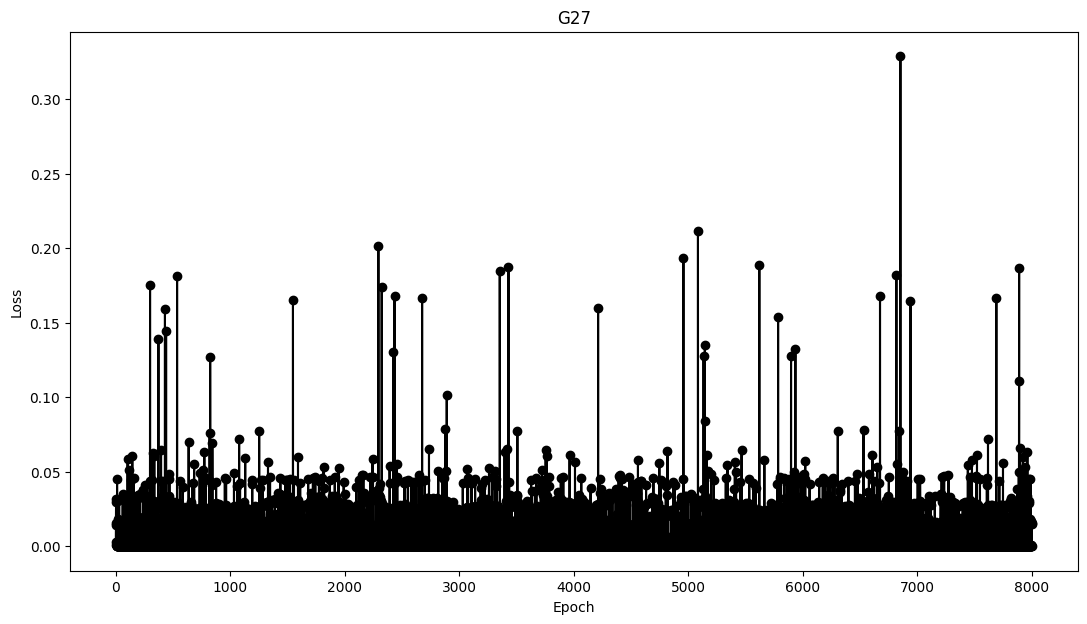

Epoch 0: loss 0.23072755429893732%, 3->3.
Epoch 100: loss 0.00325068504025694%, 3->3.
Epoch 200: loss 0.004971200905856676%, 3->3.
Epoch 300: loss 0.06549525423906744%, 1->1.
Epoch 400: loss 0.004986079875379801%, 1->1.
Epoch 500: loss 0.11736847227439284%, 1->1.
Epoch 600: loss 0.0010933334124274552%, 3->3.
Epoch 700: loss 0.0007793039912940003%, 7->7.
Epoch 800: loss 1.895812340080738%, 4->4.
Epoch 900: loss 0.002775170469249133%, 4->4.
Epoch 1000: loss 0.0008944156434154138%, 7->7.
Epoch 1100: loss 0.0010046925126516726%, 1->1.
Epoch 1200: loss 0.00995797963696532%, 1->1.
Epoch 1300: loss 0.0009848921763477847%, 1->1.
Epoch 1400: loss 0.0011782230103563052%, 1->1.
Epoch 1500: loss 3.39813195168972%, 3->3.
Epoch 1600: loss 0.0012311154023336712%, 3->3.
Epoch 1700: loss 0.00041610869629948866%, 7->7.
Epoch 1800: loss 4.476862773299217%, 3->3.
Epoch 1900: loss 1.5640296041965485%, 4->4.
Epoch 2000: loss 3.365848958492279%, 1->1.
Epoch 2100: loss 3.668556362390518%, 12->12.
Epoch 2200: 

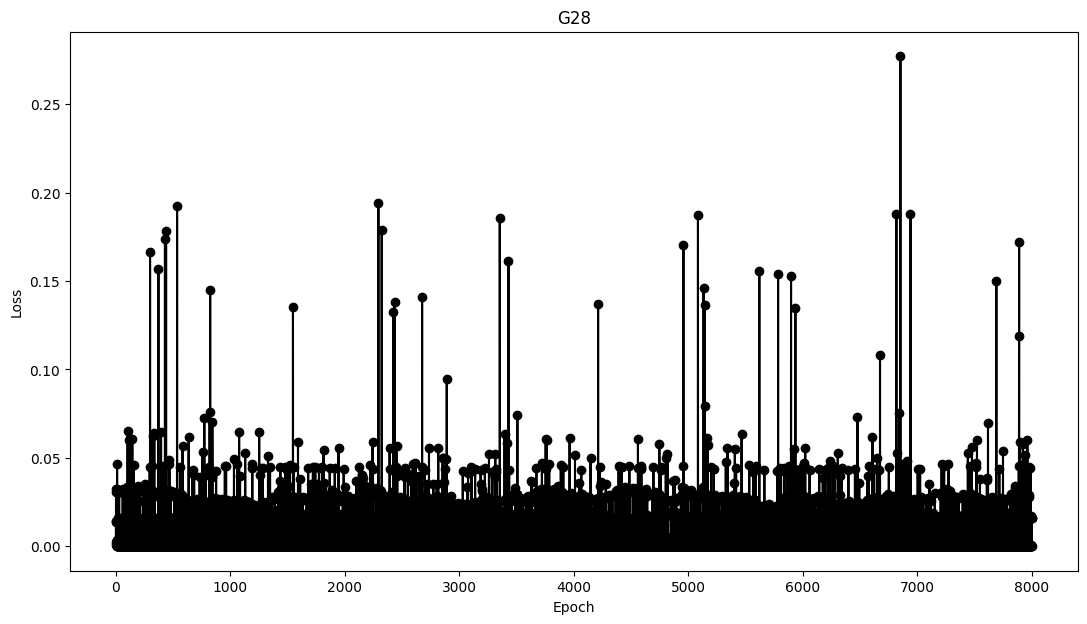

Epoch 0: loss 0.1572503475472331%, 3->3.
Epoch 100: loss 0.002891262192861177%, 3->3.
Epoch 200: loss 0.0047724704927532%, 3->3.
Epoch 300: loss 0.061948481015861034%, 1->1.
Epoch 400: loss 0.012057716958224773%, 1->1.
Epoch 500: loss 0.04684681189246476%, 1->1.
Epoch 600: loss 0.0015220772183965892%, 3->3.
Epoch 700: loss 0.001116781550081214%, 7->7.
Epoch 800: loss 1.7514226958155632%, 4->4.
Epoch 900: loss 0.0018333337720832787%, 4->4.
Epoch 1000: loss 0.0022221780454856344%, 7->7.
Epoch 1100: loss 0.0018558359442977235%, 1->1.
Epoch 1200: loss 0.004988387445337139%, 1->1.
Epoch 1300: loss 0.0011815757716249209%, 1->1.
Epoch 1400: loss 0.0011327836546115577%, 1->1.
Epoch 1500: loss 3.790992870926857%, 3->3.
Epoch 1600: loss 0.015433439693879336%, 3->3.
Epoch 1700: loss 0.00034644770039449213%, 7->7.
Epoch 1800: loss 4.699245467782021%, 3->3.
Epoch 1900: loss 1.2592095881700516%, 4->4.
Epoch 2000: loss 4.106946662068367%, 1->1.
Epoch 2100: loss 3.9990119636058807%, 12->12.
Epoch 2200

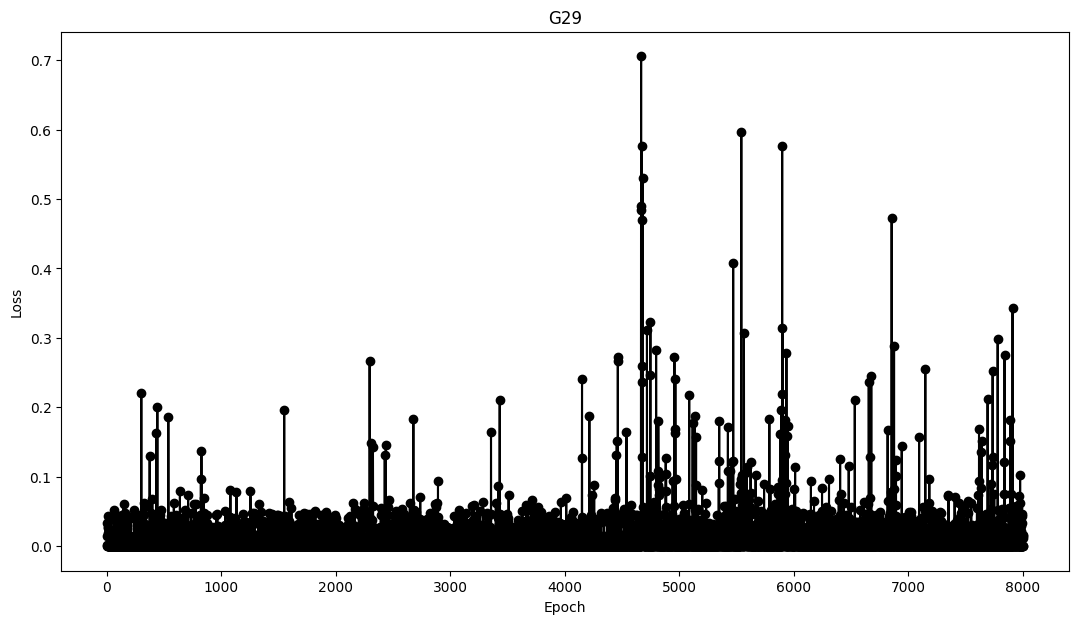

Epoch 0: loss 0.1556084374897182%, 3->3.
Epoch 100: loss 0.038521282840520144%, 3->3.
Epoch 200: loss 0.040874554542824626%, 3->3.
Epoch 300: loss 0.024341538664884865%, 1->1.
Epoch 400: loss 0.05077304085716605%, 1->1.
Epoch 500: loss 0.1616144087165594%, 1->1.
Epoch 600: loss 0.00360201156581752%, 3->3.
Epoch 700: loss 0.006295205093920231%, 7->7.
Epoch 800: loss 1.416828390210867%, 4->4.
Epoch 900: loss 0.01940116926562041%, 4->4.
Epoch 1000: loss 0.013072752335574478%, 7->7.
Epoch 1100: loss 0.00930307651287876%, 1->1.
Epoch 1200: loss 0.03945951466448605%, 1->1.
Epoch 1300: loss 0.03792534116655588%, 1->1.
Epoch 1400: loss 0.06741306860931218%, 1->1.
Epoch 1500: loss 3.081030957400799%, 3->3.
Epoch 1600: loss 0.017779815243557096%, 3->3.
Epoch 1700: loss 0.00477761568618007%, 7->7.
Epoch 1800: loss 4.635029658675194%, 3->3.
Epoch 1900: loss 1.6487384214997292%, 4->4.
Epoch 2000: loss 3.0768442898988724%, 1->1.
Epoch 2100: loss 3.155636787414551%, 12->12.
Epoch 2200: loss 0.0003375

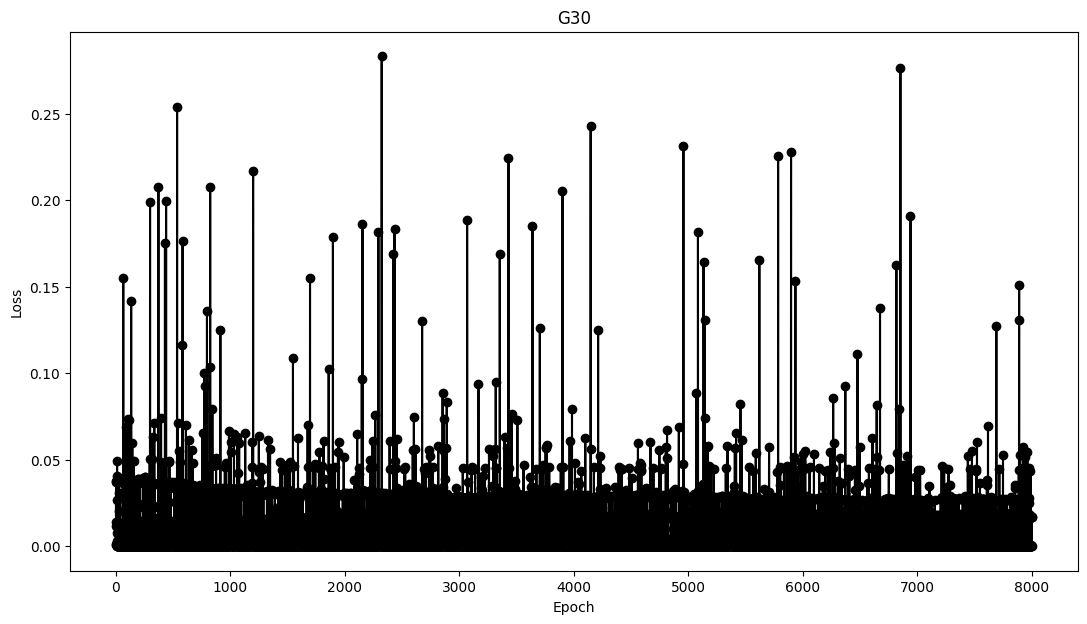

Epoch 0: loss 253.30450534820557%, 3->7.
Epoch 100: loss 217.6497220993042%, 3->1.
Epoch 200: loss 212.88633346557617%, 1->1.
Epoch 300: loss 203.3137559890747%, 3->8.
Epoch 400: loss 138.6452317237854%, 4->1.
Epoch 500: loss 119.51593160629272%, 7->3.
Epoch 600: loss 83.17384719848633%, 1->1.
Epoch 700: loss 66.05581045150757%, 1->1.
Epoch 800: loss 54.03023958206177%, 3->3.
Epoch 900: loss 43.80209445953369%, 3->3.
Epoch 1000: loss 40.38725197315216%, 1->1.
Epoch 1100: loss 26.458942890167236%, 8->8.
Epoch 1200: loss 33.46717953681946%, 3->3.
Epoch 1300: loss 31.254470348358154%, 7->7.
Epoch 1400: loss 35.78384220600128%, 8->8.
Epoch 1500: loss 29.250073432922363%, 5->5.
Epoch 1600: loss 10.513079911470413%, 8->8.
Epoch 1700: loss 27.759113907814026%, 8->8.
Epoch 1800: loss 25.234025716781616%, 8->8.
Epoch 1900: loss 20.35980373620987%, 3->3.
Loss: 0.04~2.53(0.78 on average)
Vibration: False
{'min_loss': 0.03641916811466217, 'max_loss': 2.5330450534820557, 'average_loss': 0.780145381

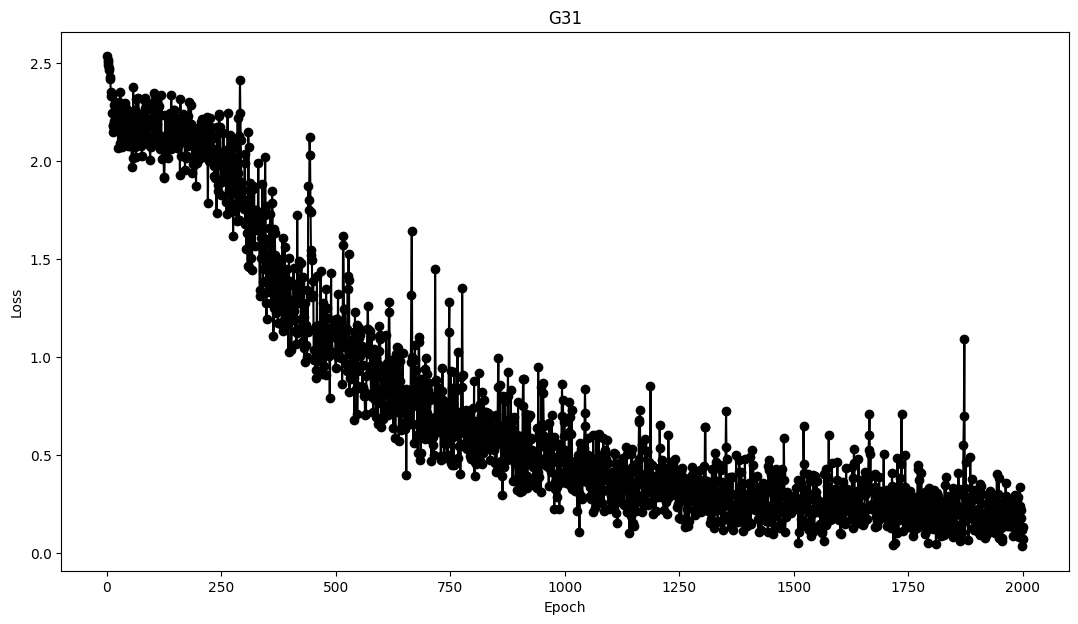

Epoch 0: loss 256.3138484954834%, 3->8.
Epoch 100: loss 233.19618701934814%, 3->8.
Epoch 200: loss 218.6682939529419%, 1->4.
Epoch 300: loss 238.13390731811523%, 3->8.
Epoch 400: loss 199.01564121246338%, 4->4.
Epoch 500: loss 142.04646348953247%, 7->7.
Epoch 600: loss 129.4216513633728%, 1->1.
Epoch 700: loss 117.58941411972046%, 1->1.
Epoch 800: loss 115.70438146591187%, 3->4.
Epoch 900: loss 96.04354500770569%, 3->8.
Epoch 1000: loss 125.75141191482544%, 1->1.
Epoch 1100: loss 83.94103646278381%, 8->8.
Epoch 1200: loss 95.22150158882141%, 3->7.
Epoch 1300: loss 99.16139841079712%, 7->7.
Epoch 1400: loss 89.76365327835083%, 8->8.
Epoch 1500: loss 84.84238982200623%, 5->8.
Epoch 1600: loss 60.847896337509155%, 8->8.
Epoch 1700: loss 107.11145401000977%, 8->12.
Epoch 1800: loss 94.83498930931091%, 8->8.
Epoch 1900: loss 90.2684211730957%, 3->0.
Loss: 0.33~5.0(1.3 on average)
Vibration: False
{'min_loss': 0.33397176861763, 'max_loss': 4.995820045471191, 'average_loss': 1.300989817559719

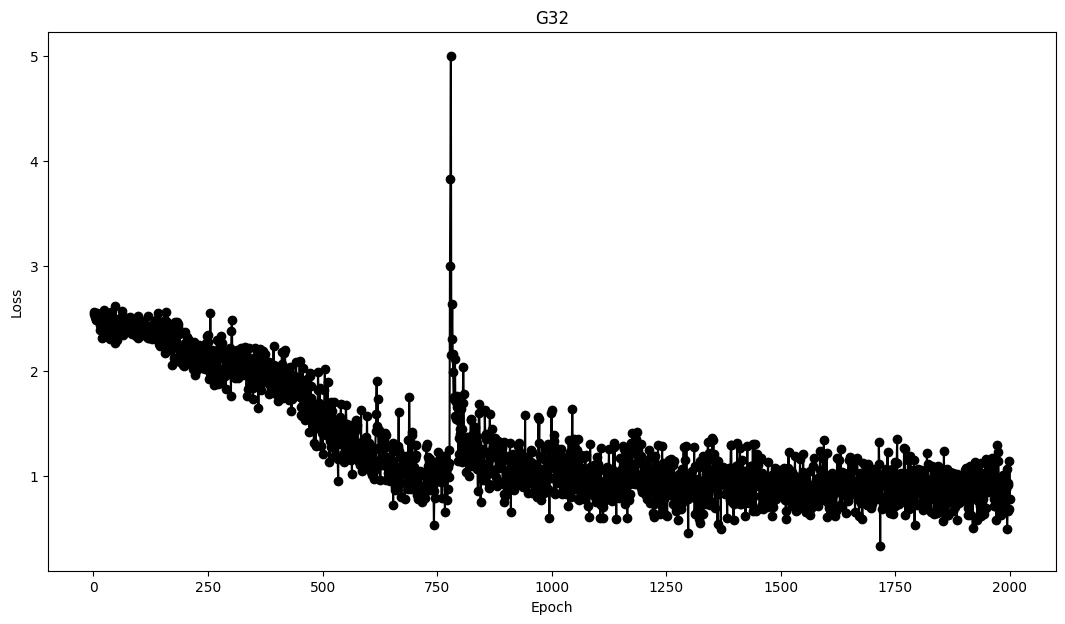

Epoch 0: loss 256.3950300216675%, 3->8.
Epoch 100: loss 225.9016752243042%, 3->8.
Epoch 200: loss 238.81802558898926%, 1->8.
Epoch 300: loss 231.08766078948975%, 3->8.
Epoch 400: loss 218.57693195343018%, 4->8.
Epoch 500: loss 189.60182666778564%, 7->8.
Epoch 600: loss 185.54829359054565%, 1->0.
Epoch 700: loss 171.01004123687744%, 1->8.
Epoch 800: loss 166.74432754516602%, 3->3.
Epoch 900: loss 191.94042682647705%, 3->3.
Epoch 1000: loss 162.43475675582886%, 1->4.
Epoch 1100: loss 173.6411452293396%, 8->8.
Epoch 1200: loss 129.12856340408325%, 3->3.
Epoch 1300: loss 152.71012783050537%, 7->7.
Epoch 1400: loss 160.0641369819641%, 8->8.
Epoch 1500: loss 137.76326179504395%, 5->5.
Epoch 1600: loss 116.26942157745361%, 8->8.
Epoch 1700: loss 137.6061201095581%, 8->5.
Epoch 1800: loss 97.16329574584961%, 8->8.
Epoch 1900: loss 143.3184266090393%, 3->3.
Loss: 0.67~2.64(1.71 on average)
Vibration: False
{'min_loss': 0.6691141724586487, 'max_loss': 2.641950845718384, 'average_loss': 1.7066586

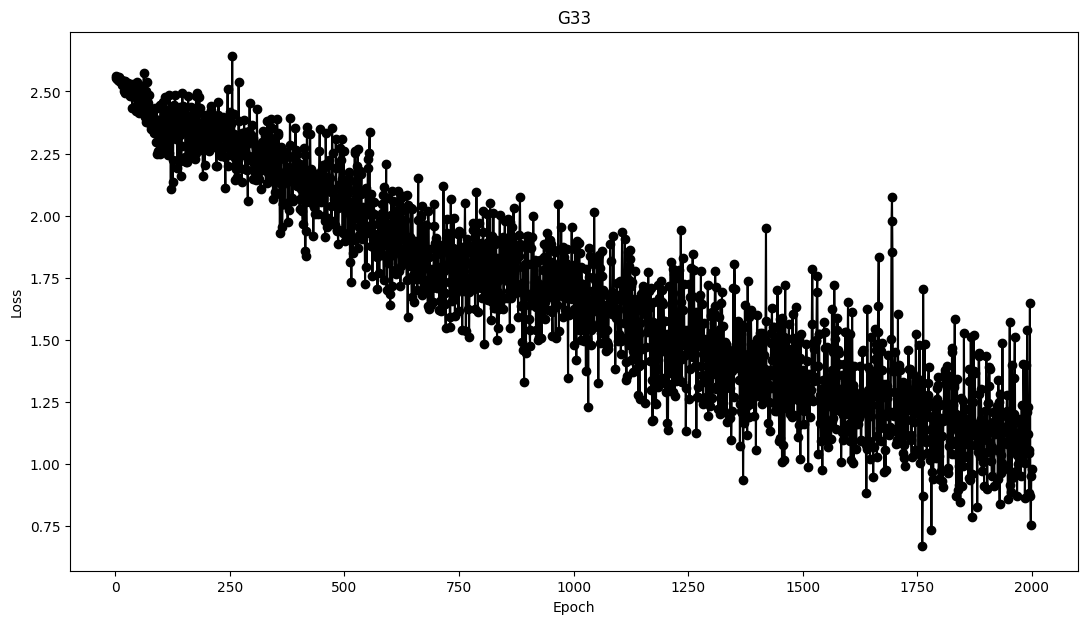

Epoch 0: loss 258.8207960128784%, 3->12.
Epoch 100: loss 181.04740381240845%, 3->8.
Epoch 200: loss 217.93527603149414%, 1->8.
Epoch 300: loss 223.68545532226562%, 3->8.
Epoch 400: loss 230.33499717712402%, 4->8.
Epoch 500: loss 224.5544195175171%, 7->1.
Epoch 600: loss 205.03547191619873%, 1->8.
Epoch 700: loss 208.7050437927246%, 1->8.
Epoch 800: loss 208.64858627319336%, 3->8.
Epoch 900: loss 211.12232208251953%, 3->1.
Epoch 1000: loss 216.99557304382324%, 1->8.
Epoch 1100: loss 204.92312908172607%, 8->8.
Epoch 1200: loss 223.45752716064453%, 3->8.
Epoch 1300: loss 212.73577213287354%, 7->8.
Epoch 1400: loss 226.7510175704956%, 8->8.
Epoch 1500: loss 223.20568561553955%, 5->8.
Epoch 1600: loss 203.6381959915161%, 8->8.
Epoch 1700: loss 206.43877983093262%, 8->8.
Epoch 1800: loss 207.1012258529663%, 8->1.
Epoch 1900: loss 210.4905128479004%, 3->8.
Loss: 1.44~3.92(2.2 on average)
Vibration: False
{'min_loss': 1.4438698291778564, 'max_loss': 3.9193413257598877, 'average_loss': 2.195966

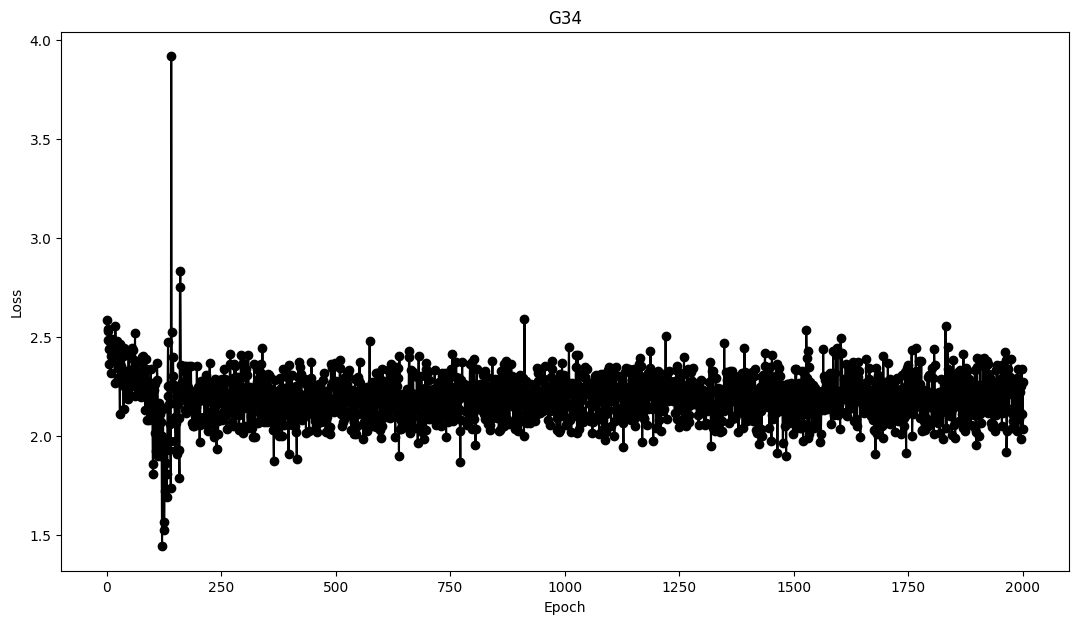

Epoch 0: loss 256.67710304260254%, 3->3.
Epoch 100: loss 249.69182014465332%, 3->8.
Epoch 200: loss 250.07569789886475%, 1->8.
Epoch 300: loss 247.00846672058105%, 3->8.
Epoch 400: loss 242.4905776977539%, 4->8.
Epoch 500: loss 222.5910186767578%, 7->8.
Epoch 600: loss 206.0288429260254%, 1->8.
Epoch 700: loss 205.6069850921631%, 1->8.
Epoch 800: loss 209.1231346130371%, 3->8.
Epoch 900: loss 213.31136226654053%, 3->8.
Epoch 1000: loss 221.61343097686768%, 1->8.
Epoch 1100: loss 208.70211124420166%, 8->8.
Epoch 1200: loss 226.2784719467163%, 3->8.
Epoch 1300: loss 217.86065101623535%, 7->8.
Epoch 1400: loss 226.4443874359131%, 8->8.
Epoch 1500: loss 216.6612148284912%, 5->8.
Epoch 1600: loss 201.46243572235107%, 8->8.
Epoch 1700: loss 202.66287326812744%, 8->8.
Epoch 1800: loss 203.82354259490967%, 8->8.
Epoch 1900: loss 208.23485851287842%, 3->8.
Loss: 1.79~2.57(2.25 on average)
Vibration: False
{'min_loss': 1.7851378917694092, 'max_loss': 2.5667710304260254, 'average_loss': 2.2489628

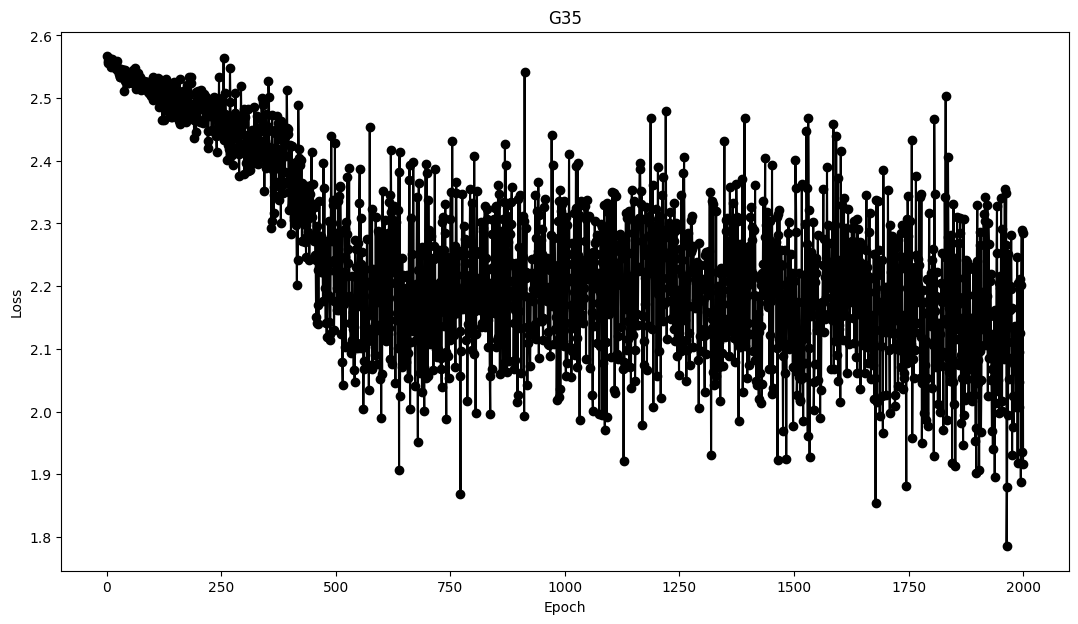

Epoch 0: loss 257.65202045440674%, 3->12.
Epoch 100: loss 251.836895942688%, 1->3.
Epoch 200: loss 239.72084522247314%, 4->4.
Epoch 300: loss 223.83322715759277%, 1->4.
Epoch 400: loss 226.71771049499512%, 3->3.
Epoch 500: loss 213.9772653579712%, 1->4.
Epoch 600: loss 188.0732536315918%, 3->3.
Epoch 700: loss 180.72092533111572%, 8->5.
Epoch 800: loss 177.42935419082642%, 8->5.
Epoch 900: loss 164.57788944244385%, 8->5.
Epoch 1000: loss 161.69979572296143%, 3->3.
Epoch 1100: loss 167.33187437057495%, 1->0.
Epoch 1200: loss 154.79834079742432%, 4->4.
Epoch 1300: loss 169.14405822753906%, 7->7.
Epoch 1400: loss 141.5053129196167%, 1->0.
Epoch 1500: loss 143.50515604019165%, 1->0.
Epoch 1600: loss 168.14496517181396%, 8->0.
Epoch 1700: loss 162.88539171218872%, 5->5.
Epoch 1800: loss 160.85978746414185%, 3->3.
Epoch 1900: loss 154.53521013259888%, 8->0.
Loss: 1.21~2.79(1.83 on average)
Vibration: False
{'min_loss': 1.206904411315918, 'max_loss': 2.7865536212921143, 'average_loss': 1.8299

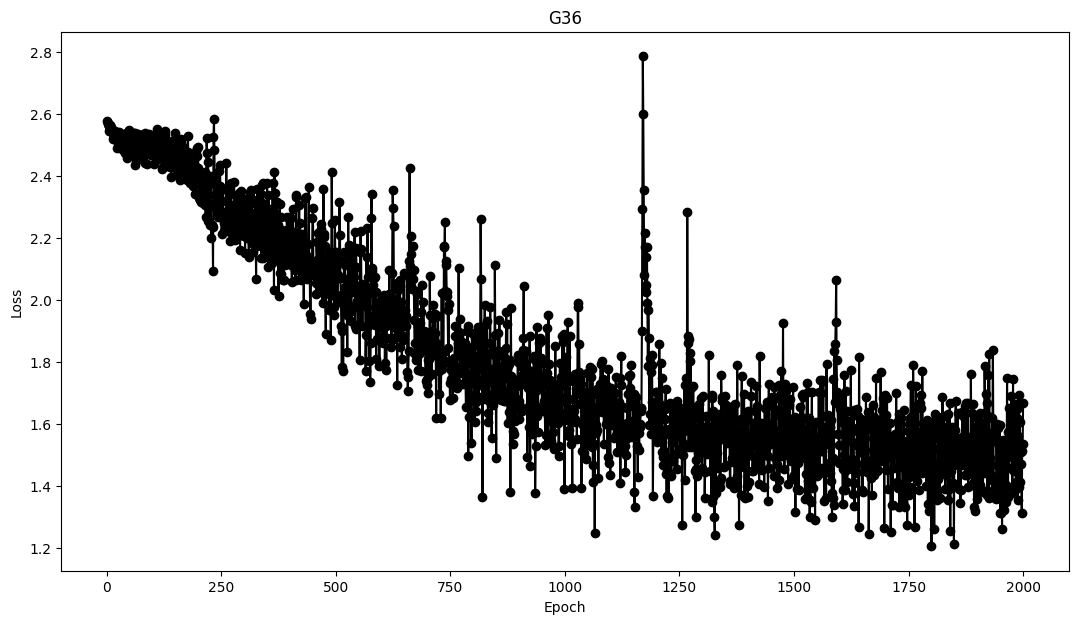

Epoch 0: loss 256.6751718521118%, 3->6.
Epoch 100: loss 220.46546936035156%, 1->8.
Epoch 200: loss 196.8524694442749%, 4->1.
Epoch 300: loss 129.97921705245972%, 1->1.
Epoch 400: loss 121.58432006835938%, 3->3.
Epoch 500: loss 79.87456321716309%, 1->1.
Epoch 600: loss 65.30399918556213%, 3->3.
Epoch 700: loss 42.5268679857254%, 8->8.
Epoch 800: loss 27.46228277683258%, 8->8.
Epoch 900: loss 39.07744884490967%, 8->8.
Epoch 1000: loss 62.61639595031738%, 3->3.
Epoch 1100: loss 30.943554639816284%, 1->1.
Epoch 1200: loss 43.30633282661438%, 4->4.
Epoch 1300: loss 27.992796897888184%, 7->7.
Epoch 1400: loss 22.738201916217804%, 1->1.
Epoch 1500: loss 32.2007030248642%, 1->1.
Epoch 1600: loss 30.433553457260132%, 8->8.
Epoch 1700: loss 30.515387654304504%, 5->5.
Epoch 1800: loss 18.026556074619293%, 3->3.
Epoch 1900: loss 17.610692977905273%, 8->8.
Loss: 0.07~2.73(0.7 on average)
Vibration: False
{'min_loss': 0.06782913208007812, 'max_loss': 2.729039430618286, 'average_loss': 0.695736818306

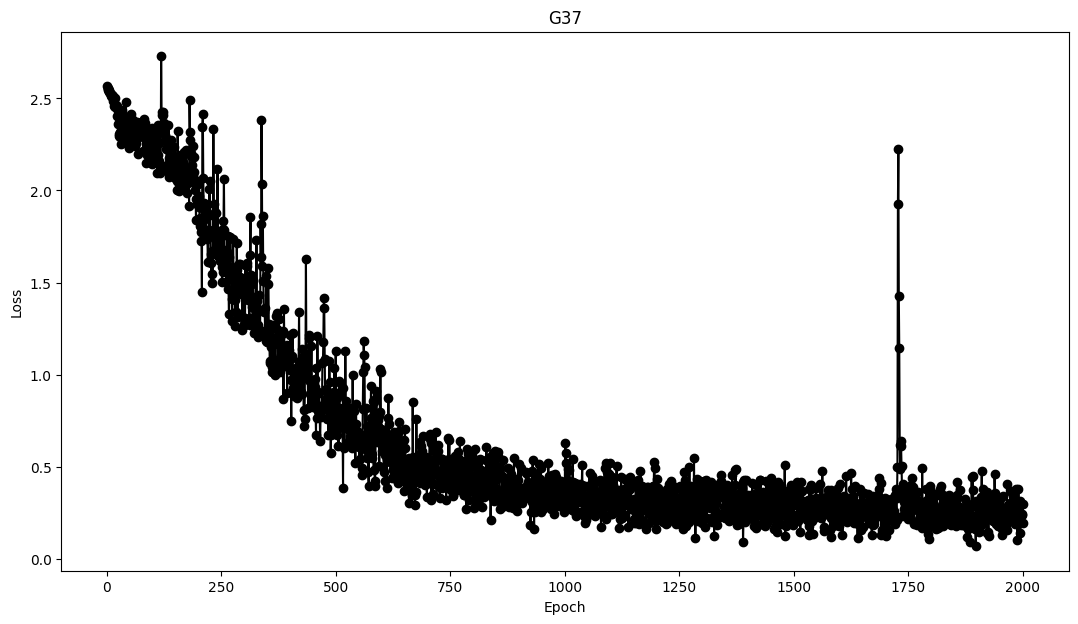

Epoch 0: loss 256.564998626709%, 3->4.
Epoch 100: loss 214.84005451202393%, 1->8.
Epoch 200: loss 224.5046854019165%, 4->8.
Epoch 300: loss 210.54916381835938%, 1->8.
Epoch 400: loss 210.20312309265137%, 3->8.
Epoch 500: loss 176.9190549850464%, 1->1.
Epoch 600: loss 178.39754819869995%, 3->1.
Epoch 700: loss 126.75739526748657%, 8->8.
Epoch 800: loss 120.83338499069214%, 8->8.
Epoch 900: loss 109.59614515304565%, 8->8.
Epoch 1000: loss 102.99333333969116%, 3->3.
Epoch 1100: loss 76.65326595306396%, 1->1.
Epoch 1200: loss 105.5567741394043%, 4->3.
Epoch 1300: loss 70.75247168540955%, 7->3.
Epoch 1400: loss 52.89810299873352%, 1->8.
Epoch 1500: loss 55.50353527069092%, 1->6.
Epoch 1600: loss 54.79523539543152%, 8->8.
Epoch 1700: loss 56.44006133079529%, 5->5.
Epoch 1800: loss 34.84410345554352%, 3->3.
Epoch 1900: loss 61.414122581481934%, 8->8.
Loss: 0.28~2.57(1.23 on average)
Vibration: False
{'min_loss': 0.2834714651107788, 'max_loss': 2.568053722381592, 'average_loss': 1.228195372149

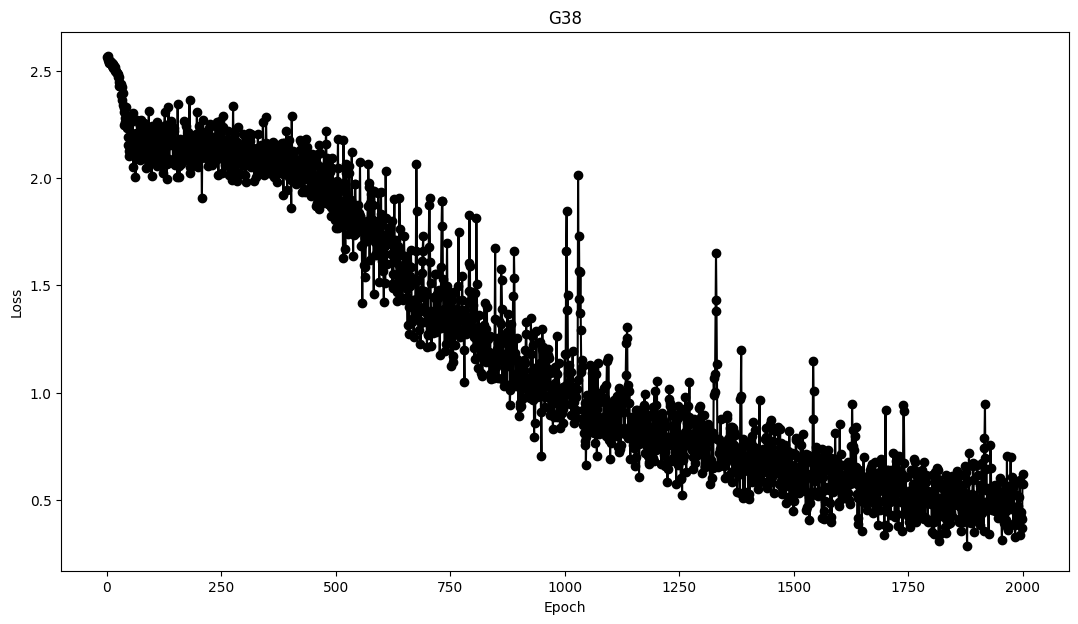

Epoch 0: loss 255.56762218475342%, 3->8.
Epoch 100: loss 216.31484031677246%, 1->4.
Epoch 200: loss 222.94881343841553%, 4->4.
Epoch 300: loss 157.0805311203003%, 1->3.
Epoch 400: loss 149.7750759124756%, 3->5.
Epoch 500: loss 118.18664073944092%, 1->5.
Epoch 600: loss 68.72697472572327%, 3->7.
Epoch 700: loss 47.04030454158783%, 8->8.
Epoch 800: loss 25.474119186401367%, 8->8.
Epoch 900: loss 29.437145590782166%, 8->8.
Epoch 1000: loss 34.549468755722046%, 3->3.
Epoch 1100: loss 19.35400813817978%, 1->1.
Epoch 1200: loss 38.94283175468445%, 4->4.
Epoch 1300: loss 20.220375061035156%, 7->7.
Epoch 1400: loss 18.993903696537018%, 1->1.
Epoch 1500: loss 16.019032895565033%, 1->1.
Epoch 1600: loss 20.63169628381729%, 8->8.
Epoch 1700: loss 29.274407029151917%, 5->5.
Epoch 1800: loss 9.12695974111557%, 3->3.
Epoch 1900: loss 13.772633671760559%, 8->5.
Loss: 0.04~2.59(0.7 on average)
Vibration: False
{'min_loss': 0.03722872957587242, 'max_loss': 2.5905768871307373, 'average_loss': 0.70054420

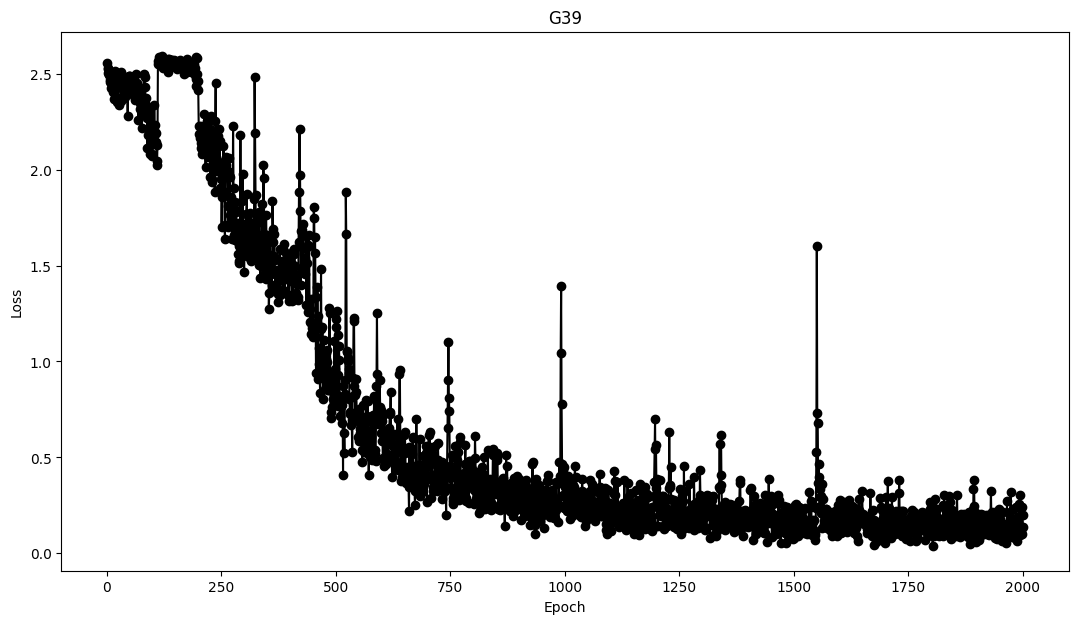

Epoch 0: loss 255.84404468536377%, 3->8.
Epoch 100: loss 249.61605072021484%, 1->8.
Epoch 200: loss 237.65692710876465%, 4->8.
Epoch 300: loss 230.30400276184082%, 1->8.
Epoch 400: loss 237.9500150680542%, 3->8.
Epoch 500: loss 234.80873107910156%, 1->8.
Epoch 600: loss 232.2951316833496%, 3->8.
Epoch 700: loss 228.49621772766113%, 8->8.
Epoch 800: loss 232.9617977142334%, 8->8.
Epoch 900: loss 230.69870471954346%, 8->8.
Epoch 1000: loss 235.35490036010742%, 3->8.
Epoch 1100: loss 213.97724151611328%, 1->8.
Epoch 1200: loss 242.37990379333496%, 4->8.
Epoch 1300: loss 218.7556505203247%, 7->8.
Epoch 1400: loss 225.66704750061035%, 1->8.
Epoch 1500: loss 212.51537799835205%, 1->8.
Epoch 1600: loss 221.27859592437744%, 8->8.
Epoch 1700: loss 222.12390899658203%, 5->4.
Epoch 1800: loss 190.8024549484253%, 3->8.
Epoch 1900: loss 211.02886199951172%, 8->8.
Loss: 1.91~2.56(2.31 on average)
Vibration: False
{'min_loss': 1.908024549484253, 'max_loss': 2.5632269382476807, 'average_loss': 2.30696

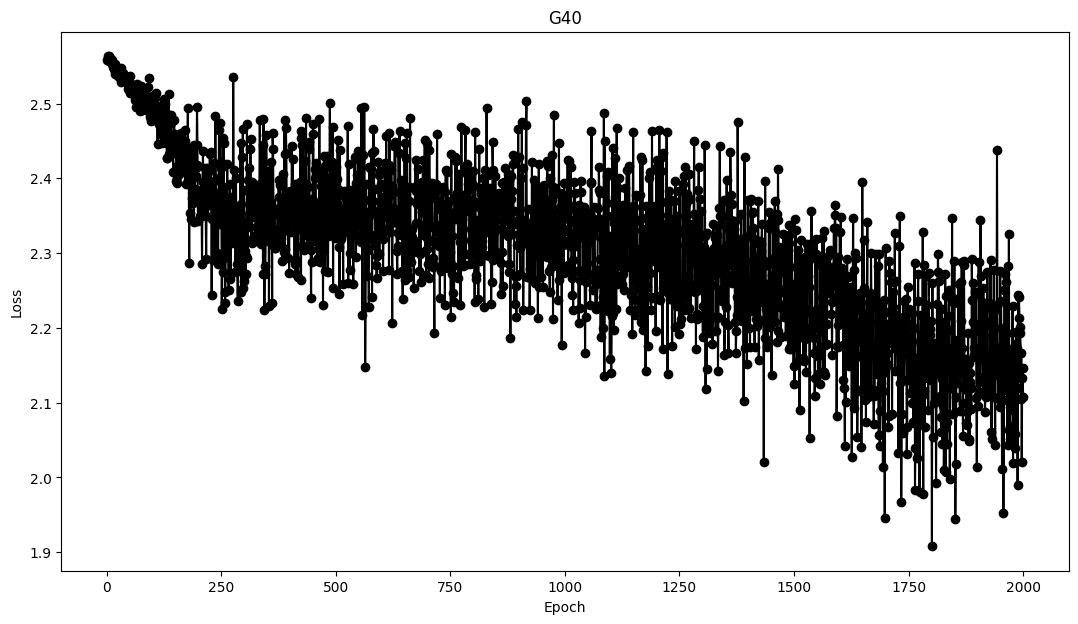

Epoch 0: loss 254.52418327331543%, 3->12.
Epoch 100: loss 230.2990198135376%, 3->8.
Epoch 200: loss 242.47667789459229%, 3->1.
Epoch 300: loss 226.87056064605713%, 1->1.
Epoch 400: loss 155.18600940704346%, 1->1.
Epoch 500: loss 187.6399278640747%, 1->1.
Epoch 600: loss 150.68678855895996%, 3->3.
Epoch 700: loss 82.85155296325684%, 7->3.
Epoch 800: loss 133.2055687904358%, 4->4.
Epoch 900: loss 101.89106464385986%, 4->4.
Epoch 1000: loss 96.0003137588501%, 7->12.
Epoch 1100: loss 66.95839166641235%, 1->1.
Epoch 1200: loss 70.44568657875061%, 1->1.
Epoch 1300: loss 22.565683722496033%, 1->1.
Epoch 1400: loss 23.000548779964447%, 1->1.
Epoch 1500: loss 93.66350173950195%, 3->3.
Epoch 1600: loss 25.648605823516846%, 3->3.
Epoch 1700: loss 13.315719366073608%, 7->7.
Epoch 1800: loss 30.374160408973694%, 3->3.
Epoch 1900: loss 36.67793273925781%, 4->4.
Loss: 0.03~2.74(0.99 on average)
Vibration: False
{'min_loss': 0.033299755305051804, 'max_loss': 2.7417054176330566, 'average_loss': 0.99091

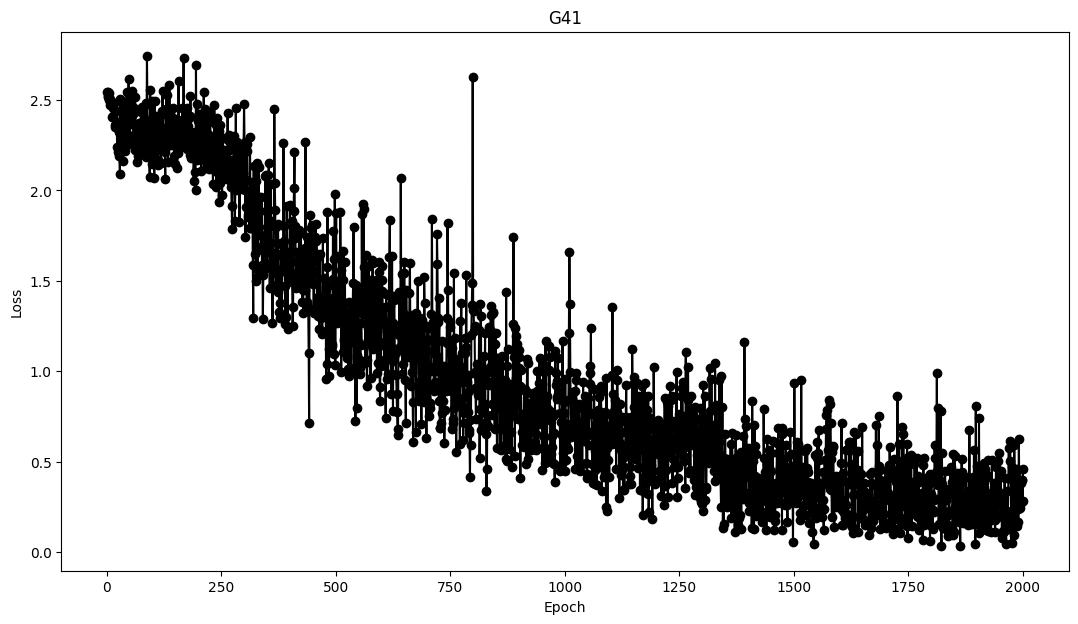

Epoch 0: loss 257.76686668395996%, 3->10.
Epoch 100: loss 241.10183715820312%, 3->1.
Epoch 200: loss 244.22883987426758%, 3->1.
Epoch 300: loss 208.71455669403076%, 1->1.
Epoch 400: loss 175.9381890296936%, 1->1.
Epoch 500: loss 191.35777950286865%, 1->1.
Epoch 600: loss 156.14341497421265%, 3->3.
Epoch 700: loss 103.10804843902588%, 7->7.
Epoch 800: loss 165.74721336364746%, 4->7.
Epoch 900: loss 160.5312705039978%, 4->0.
Epoch 1000: loss 160.33906936645508%, 7->7.
Epoch 1100: loss 104.93096113204956%, 1->1.
Epoch 1200: loss 144.5065140724182%, 1->1.
Epoch 1300: loss 115.24487733840942%, 1->1.
Epoch 1400: loss 107.88543224334717%, 1->1.
Epoch 1500: loss 120.46573162078857%, 3->3.
Epoch 1600: loss 90.068918466568%, 3->3.
Epoch 1700: loss 138.22836875915527%, 7->7.
Epoch 1800: loss 105.44549226760864%, 3->3.
Epoch 1900: loss 115.9361481666565%, 4->5.
Loss: 0.59~2.84(1.6 on average)
Vibration: False
{'min_loss': 0.5916337966918945, 'max_loss': 2.8422937393188477, 'average_loss': 1.600645

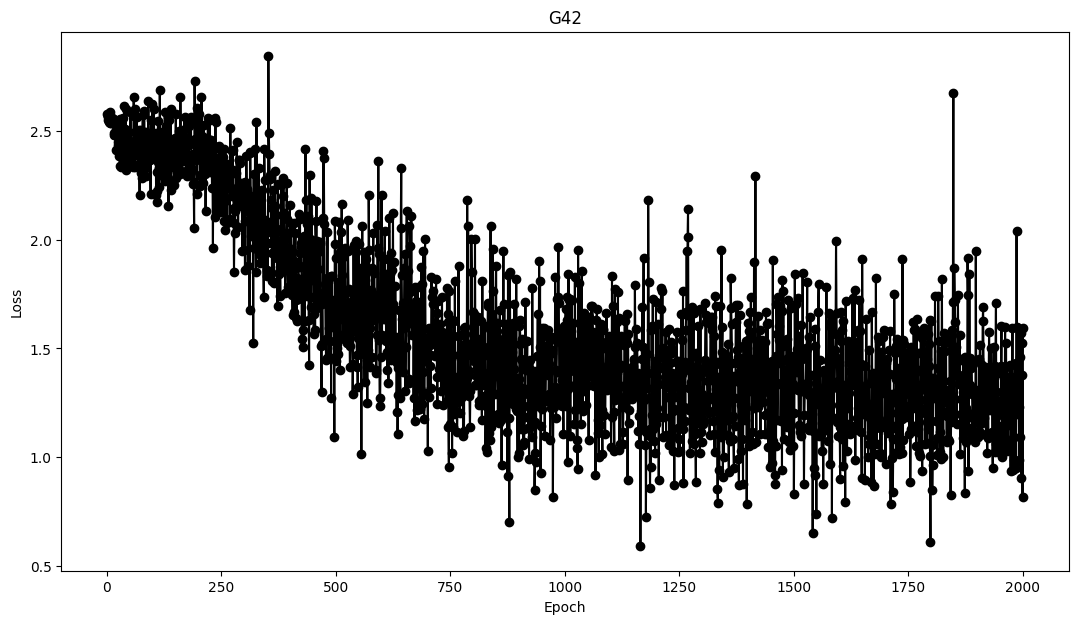

Epoch 0: loss 254.50897216796875%, 3->1.
Epoch 100: loss 239.2777919769287%, 3->1.
Epoch 200: loss 245.87805271148682%, 3->1.
Epoch 300: loss 239.8510456085205%, 1->1.
Epoch 400: loss 229.82444763183594%, 1->1.
Epoch 500: loss 238.5758399963379%, 1->1.
Epoch 600: loss 205.51316738128662%, 3->3.
Epoch 700: loss 184.33071374893188%, 7->3.
Epoch 800: loss 208.48329067230225%, 4->3.
Epoch 900: loss 216.41840934753418%, 4->1.
Epoch 1000: loss 181.51817321777344%, 7->8.
Epoch 1100: loss 156.7013144493103%, 1->1.
Epoch 1200: loss 143.7281370162964%, 1->1.
Epoch 1300: loss 95.38674354553223%, 1->1.
Epoch 1400: loss 114.8124098777771%, 1->1.
Epoch 1500: loss 133.89476537704468%, 3->3.
Epoch 1600: loss 91.63503050804138%, 3->3.
Epoch 1700: loss 93.0180311203003%, 7->8.
Epoch 1800: loss 100.23913383483887%, 3->3.
Epoch 1900: loss 122.10263013839722%, 4->8.
Loss: 0.4~2.66(1.71 on average)
Vibration: False
{'min_loss': 0.402791827917099, 'max_loss': 2.6623029708862305, 'average_loss': 1.71195530666

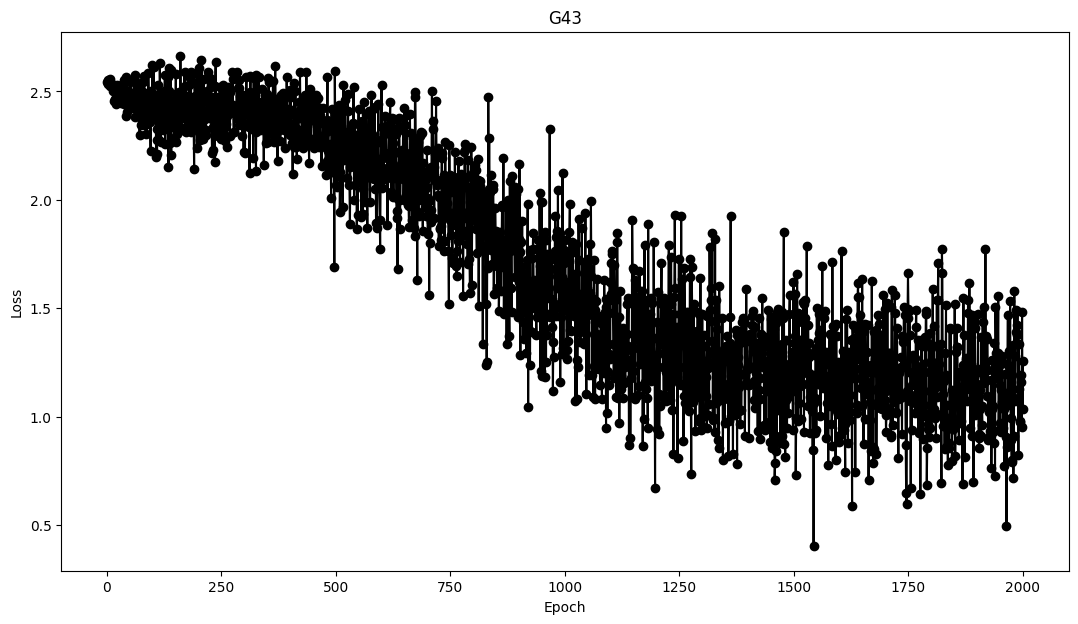

Epoch 0: loss 257.2411298751831%, 3->7.
Epoch 100: loss 256.49492740631104%, 3->0.
Epoch 200: loss 256.49492740631104%, 3->0.
Epoch 300: loss 256.49492740631104%, 1->0.
Epoch 400: loss 256.49492740631104%, 1->0.
Epoch 500: loss 256.49492740631104%, 1->0.
Epoch 600: loss 256.49492740631104%, 3->0.
Epoch 700: loss 256.49492740631104%, 7->0.
Epoch 800: loss 256.49492740631104%, 4->0.
Epoch 900: loss 256.49492740631104%, 4->0.
Epoch 1000: loss 256.49492740631104%, 7->0.
Epoch 1100: loss 256.49492740631104%, 1->0.
Epoch 1200: loss 256.49492740631104%, 1->0.
Epoch 1300: loss 256.49492740631104%, 1->0.
Epoch 1400: loss 256.49492740631104%, 1->0.
Epoch 1500: loss 256.49492740631104%, 3->0.
Epoch 1600: loss 256.49492740631104%, 3->0.
Epoch 1700: loss 256.49492740631104%, 7->0.
Epoch 1800: loss 256.49492740631104%, 3->0.
Epoch 1900: loss 256.49492740631104%, 4->0.
Loss: 2.56~2.57(2.56 on average)
Vibration: False
{'min_loss': 2.5633773803710938, 'max_loss': 2.572411298751831, 'average_loss': 2.5

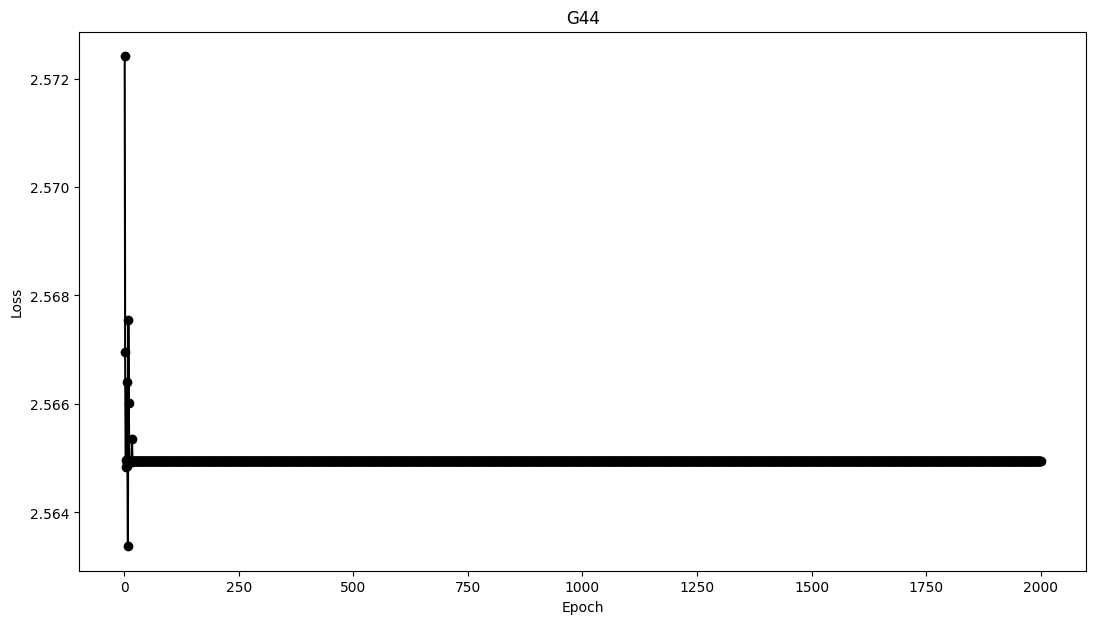

Epoch 0: loss 254.60691452026367%, 3->1.
Epoch 100: loss 247.1412181854248%, 3->8.
Epoch 200: loss 240.46850204467773%, 3->8.
Epoch 300: loss 238.53049278259277%, 1->8.
Epoch 400: loss 234.29503440856934%, 1->8.
Epoch 500: loss 240.51225185394287%, 1->8.
Epoch 600: loss 213.419508934021%, 3->8.
Epoch 700: loss 204.97219562530518%, 7->8.
Epoch 800: loss 233.28931331634521%, 4->8.
Epoch 900: loss 229.11078929901123%, 4->1.
Epoch 1000: loss 224.67191219329834%, 7->8.
Epoch 1100: loss 229.43015098571777%, 1->8.
Epoch 1200: loss 218.96333694458008%, 1->8.
Epoch 1300: loss 212.1422290802002%, 1->8.
Epoch 1400: loss 201.72393321990967%, 1->8.
Epoch 1500: loss 200.79450607299805%, 3->8.
Epoch 1600: loss 187.58165836334229%, 3->8.
Epoch 1700: loss 190.6125545501709%, 7->1.
Epoch 1800: loss 176.14972591400146%, 3->1.
Epoch 1900: loss 193.06448698043823%, 4->8.
Loss: 1.42~2.66(2.17 on average)
Vibration: False
{'min_loss': 1.4235788583755493, 'max_loss': 2.6628401279449463, 'average_loss': 2.1682

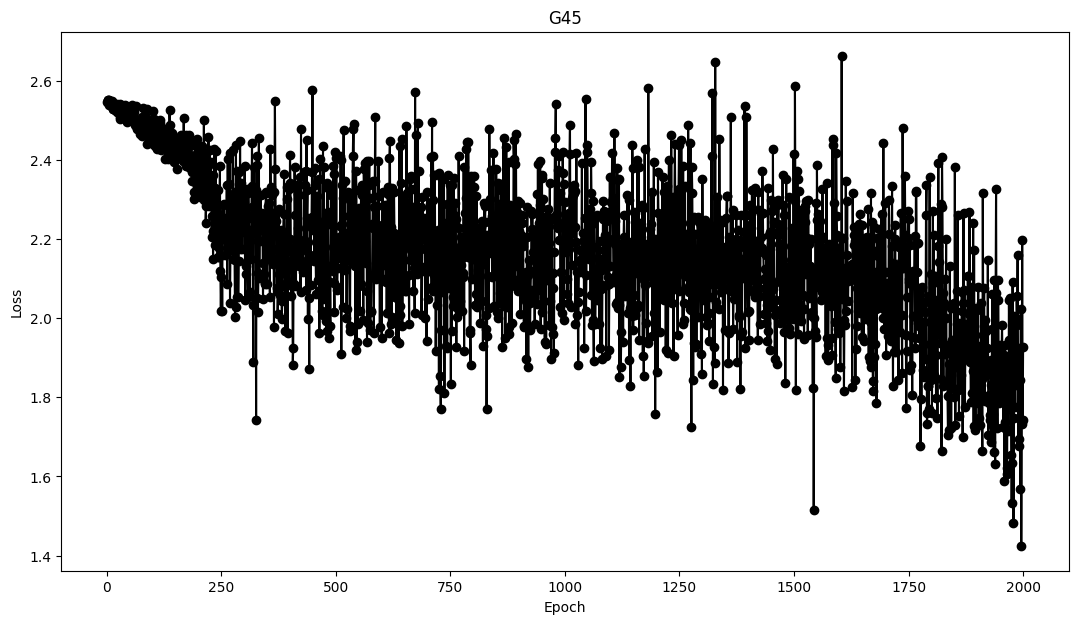

Epoch 0: loss 256.56306743621826%, 3->10.
Epoch 100: loss 253.46434116363525%, 3->3.
Epoch 200: loss 249.91612434387207%, 1->3.
Epoch 300: loss 238.46254348754883%, 3->3.
Epoch 400: loss 220.28491497039795%, 4->1.
Epoch 500: loss 220.647931098938%, 7->1.
Epoch 600: loss 157.61958360671997%, 1->1.
Epoch 700: loss 140.67866802215576%, 1->4.
Epoch 800: loss 92.08205938339233%, 3->3.
Epoch 900: loss 108.46220254898071%, 3->8.
Epoch 1000: loss 91.24028086662292%, 1->1.
Epoch 1100: loss 60.47465801239014%, 8->8.
Epoch 1200: loss 76.826012134552%, 3->3.
Epoch 1300: loss 78.51548194885254%, 7->0.
Epoch 1400: loss 96.94547653198242%, 8->8.
Epoch 1500: loss 71.37296199798584%, 5->5.
Epoch 1600: loss 54.83421087265015%, 8->8.
Epoch 1700: loss 50.06868243217468%, 8->5.
Epoch 1800: loss 56.10387325286865%, 8->8.
Epoch 1900: loss 41.84163808822632%, 3->3.
Epoch 2000: loss 77.0495057106018%, 3->3.
Epoch 2100: loss 28.714722394943237%, 8->8.
Epoch 2200: loss 13.256226480007172%, 1->1.
Epoch 2300: loss

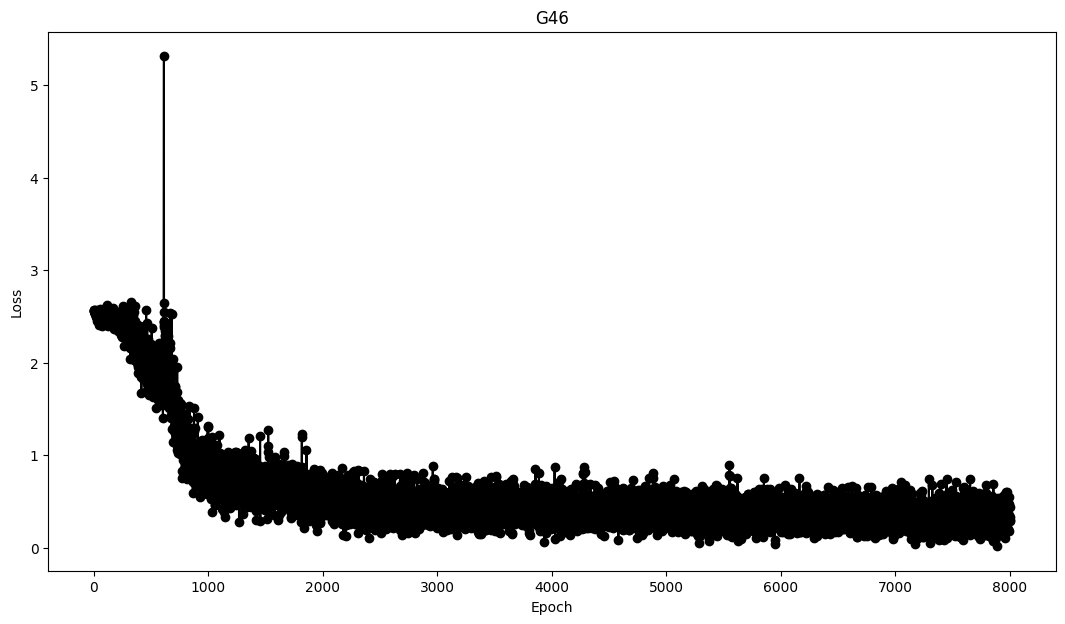

Epoch 0: loss 255.079984664917%, 3->8.
Epoch 100: loss 232.69667625427246%, 3->1.
Epoch 200: loss 205.88932037353516%, 1->1.
Epoch 300: loss 196.45085334777832%, 3->3.
Epoch 400: loss 164.6519660949707%, 4->1.
Epoch 500: loss 99.77123737335205%, 7->7.
Epoch 600: loss 78.54471802711487%, 1->1.
Epoch 700: loss 38.749125599861145%, 1->1.
Epoch 800: loss 46.22577428817749%, 3->3.
Epoch 900: loss 39.44796919822693%, 3->3.
Epoch 1000: loss 39.28171992301941%, 1->6.
Epoch 1100: loss 41.294994950294495%, 8->8.
Epoch 1200: loss 36.94661259651184%, 3->3.
Epoch 1300: loss 33.52336585521698%, 7->7.
Epoch 1400: loss 53.655219078063965%, 8->8.
Epoch 1500: loss 21.03562504053116%, 5->5.
Epoch 1600: loss 5.247808620333672%, 8->8.
Epoch 1700: loss 21.458908915519714%, 8->5.
Epoch 1800: loss 22.714993357658386%, 8->8.
Epoch 1900: loss 18.342213332653046%, 3->3.
Epoch 2000: loss 24.154239892959595%, 3->3.
Epoch 2100: loss 2.350755035877228%, 8->8.
Epoch 2200: loss 6.53848797082901%, 1->1.
Epoch 2300: los

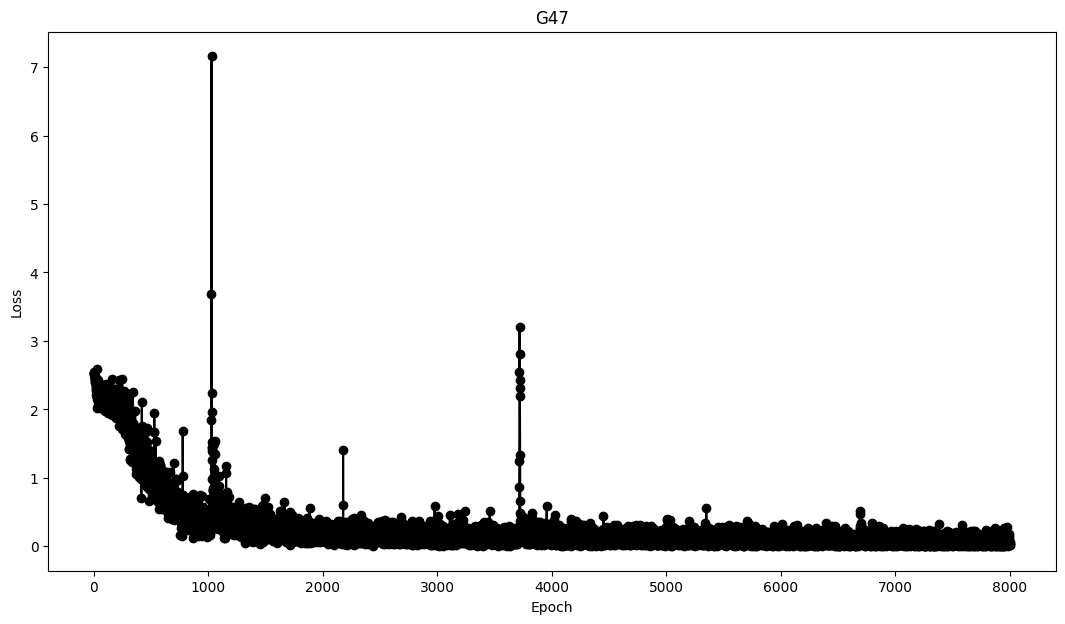

Epoch 0: loss 259.35840606689453%, 3->2.
Epoch 100: loss 256.559157371521%, 3->4.
Epoch 200: loss 255.7361125946045%, 1->4.
Epoch 300: loss 256.0739278793335%, 3->4.
Epoch 400: loss 257.0533514022827%, 4->4.
Epoch 500: loss 251.22497081756592%, 7->3.
Epoch 600: loss 244.76571083068848%, 1->3.
Epoch 700: loss 239.15200233459473%, 1->3.
Epoch 800: loss 239.20667171478271%, 3->3.
Epoch 900: loss 238.34044933319092%, 3->4.
Epoch 1000: loss 233.80248546600342%, 1->4.
Epoch 1100: loss 208.85794162750244%, 8->3.
Epoch 1200: loss 179.14527654647827%, 3->3.
Epoch 1300: loss 204.16715145111084%, 7->3.
Epoch 1400: loss 193.45703125%, 8->5.
Epoch 1500: loss 185.8431577682495%, 5->5.
Epoch 1600: loss 201.88837051391602%, 8->5.
Epoch 1700: loss 182.96509981155396%, 8->5.
Epoch 1800: loss 170.99534273147583%, 8->5.
Epoch 1900: loss 202.40750312805176%, 3->3.
Epoch 2000: loss 158.72018337249756%, 3->3.
Epoch 2100: loss 170.46250104904175%, 8->0.
Epoch 2200: loss 162.05672025680542%, 1->0.
Epoch 2300: 

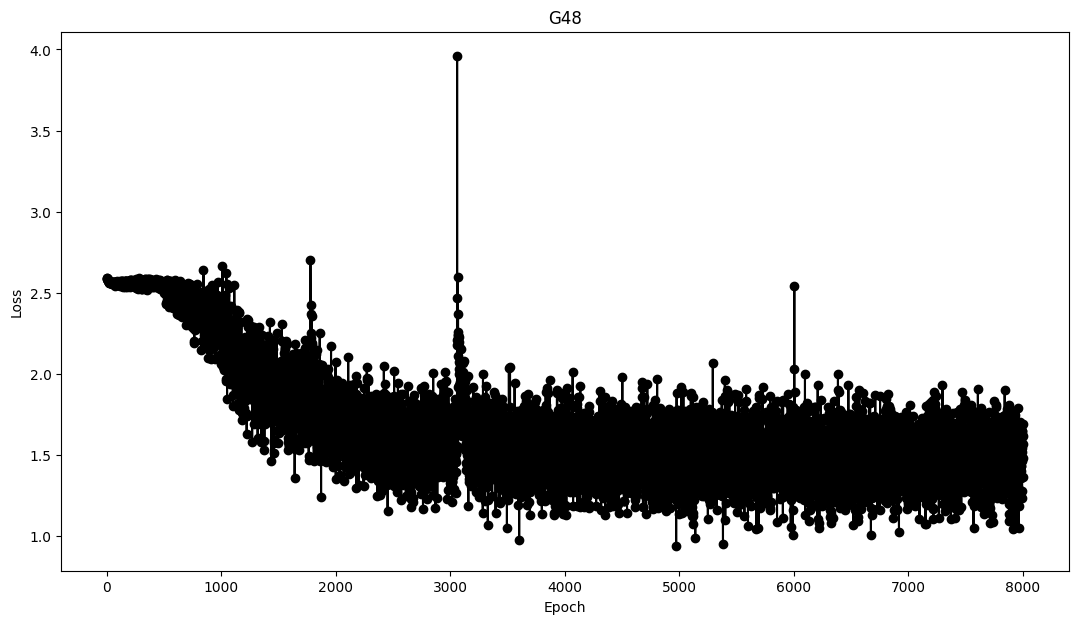

Epoch 0: loss 256.61020278930664%, 3->2.
Epoch 100: loss 231.85155391693115%, 3->1.
Epoch 200: loss 206.92760944366455%, 1->1.
Epoch 300: loss 215.86952209472656%, 3->8.
Epoch 400: loss 234.2989683151245%, 4->8.
Epoch 500: loss 163.44408988952637%, 7->1.
Epoch 600: loss 135.35228967666626%, 1->1.
Epoch 700: loss 129.44055795669556%, 1->1.
Epoch 800: loss 93.62148642539978%, 3->3.
Epoch 900: loss 92.87359714508057%, 3->3.
Epoch 1000: loss 67.30806827545166%, 1->1.
Epoch 1100: loss 83.6997389793396%, 8->7.
Epoch 1200: loss 45.221659541130066%, 3->7.
Epoch 1300: loss 60.576677322387695%, 7->7.
Epoch 1400: loss 60.0775420665741%, 8->8.
Epoch 1500: loss 48.59735369682312%, 5->3.
Epoch 1600: loss 14.045438170433044%, 8->8.
Epoch 1700: loss 37.0206356048584%, 8->5.
Epoch 1800: loss 27.20448672771454%, 8->8.
Epoch 1900: loss 47.20052480697632%, 3->3.
Epoch 2000: loss 33.36714804172516%, 3->3.
Epoch 2100: loss 12.302321940660477%, 8->8.
Epoch 2200: loss 7.933683693408966%, 1->1.
Epoch 2300: los

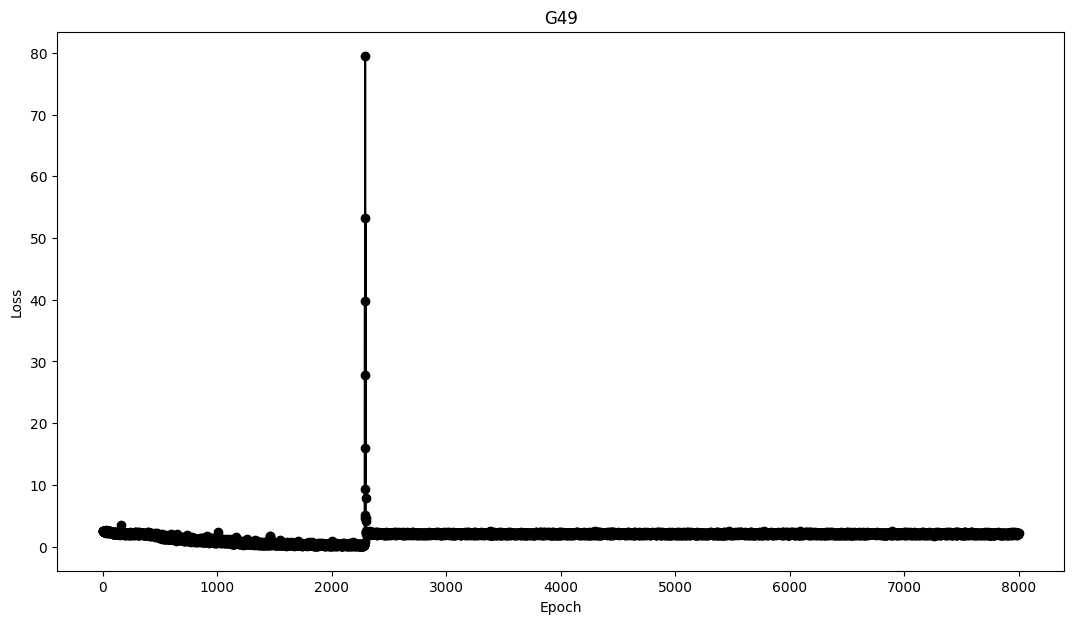

Epoch 0: loss 257.03673362731934%, 3->11.
Epoch 100: loss 254.85680103302002%, 3->3.
Epoch 200: loss 252.1550178527832%, 1->3.
Epoch 300: loss 245.1768159866333%, 3->8.
Epoch 400: loss 238.08588981628418%, 4->8.
Epoch 500: loss 209.1136932373047%, 7->8.
Epoch 600: loss 224.7990608215332%, 1->8.
Epoch 700: loss 219.56939697265625%, 1->8.
Epoch 800: loss 232.13927745819092%, 3->8.
Epoch 900: loss 243.07305812835693%, 3->8.
Epoch 1000: loss 231.03785514831543%, 1->8.
Epoch 1100: loss 233.81717205047607%, 8->8.
Epoch 1200: loss 213.48624229431152%, 3->8.
Epoch 1300: loss 226.32417678833008%, 7->8.
Epoch 1400: loss 226.71422958374023%, 8->8.
Epoch 1500: loss 211.14938259124756%, 5->8.
Epoch 1600: loss 211.7839813232422%, 8->8.
Epoch 1700: loss 209.55028533935547%, 8->8.
Epoch 1800: loss 198.34123849868774%, 8->8.
Epoch 1900: loss 224.67317581176758%, 3->8.
Epoch 2000: loss 234.42771434783936%, 3->8.
Epoch 2100: loss 195.8418369293213%, 8->8.
Epoch 2200: loss 185.8200192451477%, 1->4.
Epoch 

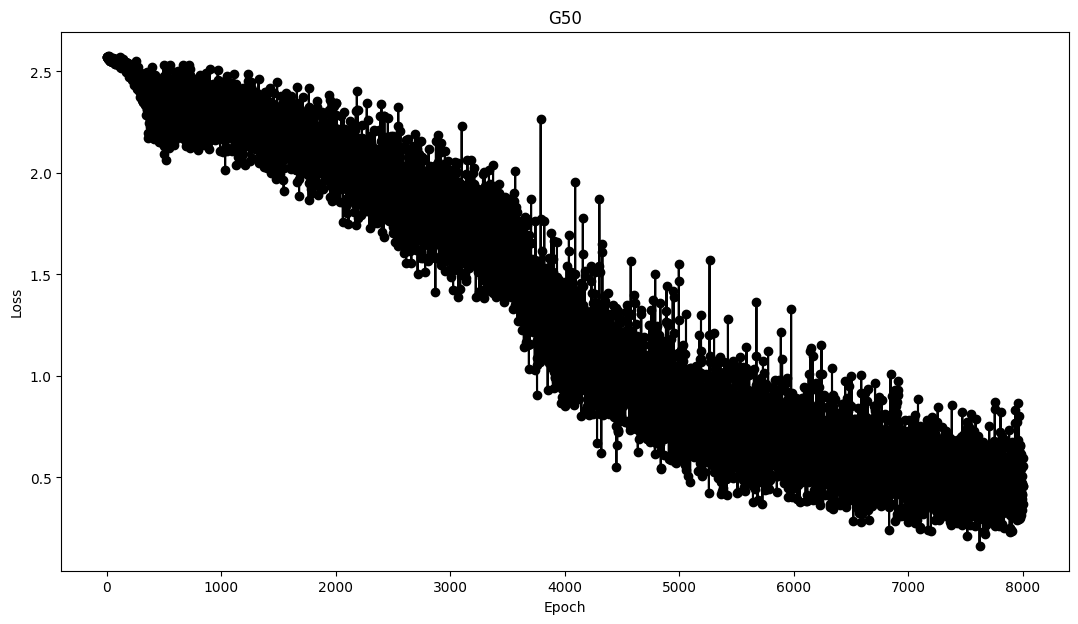

Epoch 0: loss 254.81653213500977%, 3->8.
Epoch 100: loss 206.67014122009277%, 1->1.
Epoch 200: loss 211.5009069442749%, 4->1.
Epoch 300: loss 168.29606294631958%, 1->1.
Epoch 400: loss 130.12616634368896%, 3->8.
Epoch 500: loss 84.89753603935242%, 1->1.
Epoch 600: loss 83.26069116592407%, 3->3.
Epoch 700: loss 58.75183343887329%, 8->8.
Epoch 800: loss 36.02042198181152%, 8->8.
Epoch 900: loss 42.61969327926636%, 8->8.
Epoch 1000: loss 55.90524077415466%, 3->3.
Epoch 1100: loss 29.934167861938477%, 1->1.
Epoch 1200: loss 35.671672224998474%, 4->4.
Epoch 1300: loss 22.19051718711853%, 7->7.
Epoch 1400: loss 20.811206102371216%, 1->1.
Epoch 1500: loss 16.99698120355606%, 1->1.
Epoch 1600: loss 23.20707142353058%, 8->8.
Epoch 1700: loss 21.683618426322937%, 5->5.
Epoch 1800: loss 15.624487400054932%, 3->3.
Epoch 1900: loss 14.69709426164627%, 8->8.
Epoch 2000: loss 20.156893134117126%, 3->3.
Epoch 2100: loss 10.917229950428009%, 12->12.
Epoch 2200: loss 15.444289147853851%, 3->3.
Epoch 230

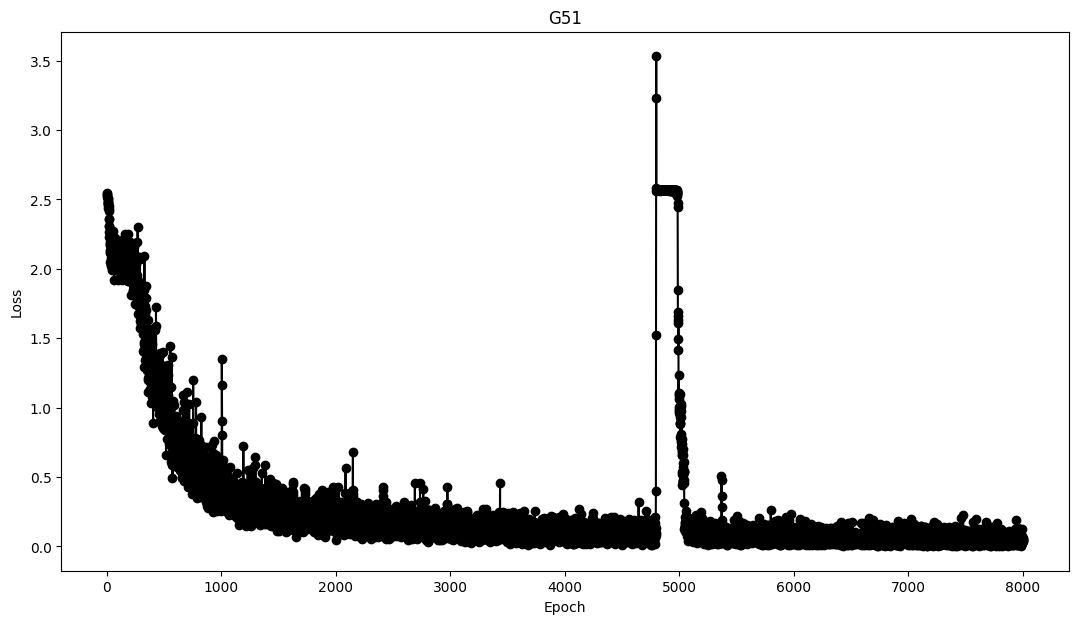

Epoch 0: loss 254.00583744049072%, 3->7.
Epoch 100: loss 212.5279188156128%, 1->1.
Epoch 200: loss 198.92911911010742%, 4->1.
Epoch 300: loss 134.63120460510254%, 1->1.
Epoch 400: loss 130.55044412612915%, 3->3.
Epoch 500: loss 85.58628559112549%, 1->1.
Epoch 600: loss 76.90123319625854%, 3->3.
Epoch 700: loss 47.529444098472595%, 8->8.
Epoch 800: loss 40.64908027648926%, 8->8.
Epoch 900: loss 43.258413672447205%, 8->8.
Epoch 1000: loss 61.12876534461975%, 3->3.
Epoch 1100: loss 33.28303396701813%, 1->1.
Epoch 1200: loss 48.71658384799957%, 4->4.
Epoch 1300: loss 33.32375884056091%, 7->7.
Epoch 1400: loss 25.57392418384552%, 1->1.
Epoch 1500: loss 32.58575797080994%, 1->1.
Epoch 1600: loss 31.57612681388855%, 8->8.
Epoch 1700: loss 37.85756230354309%, 5->5.
Epoch 1800: loss 18.72730255126953%, 3->3.
Epoch 1900: loss 25.274750590324402%, 8->8.
Epoch 2000: loss 23.225480318069458%, 3->3.
Epoch 2100: loss 25.89157521724701%, 12->12.
Epoch 2200: loss 33.058226108551025%, 3->3.
Epoch 2300: 

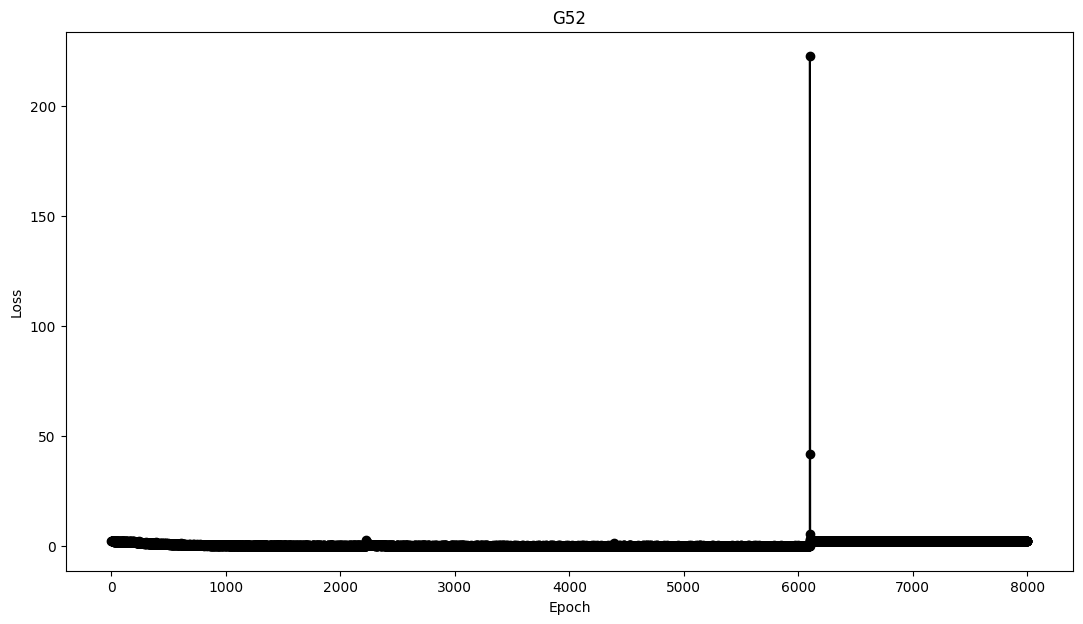

Epoch 0: loss 255.84537982940674%, 3->4.
Epoch 100: loss 236.11388206481934%, 1->1.
Epoch 200: loss 245.01893520355225%, 4->1.
Epoch 300: loss 236.94961071014404%, 1->1.
Epoch 400: loss 220.42725086212158%, 3->1.
Epoch 500: loss 193.32492351531982%, 1->4.
Epoch 600: loss 194.27223205566406%, 3->3.
Epoch 700: loss 156.58572912216187%, 8->3.
Epoch 800: loss 142.4641251564026%, 8->0.
Epoch 900: loss 134.40731763839722%, 8->5.
Epoch 1000: loss 143.04075241088867%, 3->3.
Epoch 1100: loss 125.22315979003906%, 1->1.
Epoch 1200: loss 102.48093605041504%, 4->4.
Epoch 1300: loss 109.77734327316284%, 7->7.
Epoch 1400: loss 93.38166117668152%, 1->5.
Epoch 1500: loss 95.50231695175171%, 1->1.
Epoch 1600: loss 98.48356246948242%, 8->0.
Epoch 1700: loss 94.65981721878052%, 5->5.
Epoch 1800: loss 106.74117803573608%, 3->3.
Epoch 1900: loss 107.57017135620117%, 8->0.
Epoch 2000: loss 107.6217532157898%, 3->3.
Epoch 2100: loss 90.3210699558258%, 12->0.
Epoch 2200: loss 92.07720756530762%, 3->3.
Epoch 23

In [5]:
i = 0
for task in tasks:
    i += 1
    if 1 <= i < 31:
        train(str(task[0]), str(task[1]), str(task[2]), f"G{i}", dataset)
    elif 31 <= i < 61:
        train(str(task[0]), str(task[1]), str(task[2]), f"G{i}", dataset, LeNet5())